In [ ]:
# Colab Path 설정
import os, sys
from google.colab import drive
drive.mount('/content/drive/')
my_path = '/content/notebooks'
# os.symlink('/content/drive/My Drive/Colab Notebooks/package_collection', my_path)
sys.path.insert(0, my_path)

In [47]:
# Colab Path 설정
import os, sys
from google.colab import drive
drive.mount('/content/drive/')
my_path = '/content/notebooks'
# os.symlink('/content/drive/My Drive/Colab Notebooks/package_collection', my_path)
sys.path.insert(0, my_path)

import pandas as pd
import pm4py
import numpy as np
import matplotlib.pyplot as plt
import datetime

plt.rc('font', family='NanumBarunGothic')

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

In [48]:
def token_replay(log, net, im, fm):
  from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
  replay_log = token_replay.apply(log, net, im, fm)
  # for i in replay_log:
  #   print(i)  
  fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
  prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
  gen = generalization_evaluator.apply(log, net, im, fm)
  simp = simplicity_evaluator.apply(net)  
  print("fitness : " + str(fitness) + "\nprecision : " + str(prec) + "\ngeneralization : " + str(gen) + "\nsimplicity : " + str(simp))

## 전체데이터

In [50]:
football = pd.read_csv('/content/drive/MyDrive/Colab/Data Analytics/football_event.csv')

event_log_pm4py = pm4py.format_dataframe(football, case_id='id_odsp', activity_key='event_type', timestamp_key='datetime', timest_format='%Y-%m-%d %H:%M:%S')
event_log_pm4py

case:concept:name  ... @@index
71851   12 AC Ajaccio vs AJ Auxerre  ...   71851
71852   12 AC Ajaccio vs AJ Auxerre  ...   71852
71853   12 AC Ajaccio vs AJ Auxerre  ...   71853
71854   12 AC Ajaccio vs AJ Auxerre  ...   71854
71855   12 AC Ajaccio vs AJ Auxerre  ...   71855
...                             ...  ...     ...
853861       17 West Ham vs Watford  ...  853861
853862       17 West Ham vs Watford  ...  853862
853863       17 West Ham vs Watford  ...  853863
853859       17 West Ham vs Watford  ...  853859
853864       17 West Ham vs Watford  ...  853864

[941009 rows x 27 columns]

In [51]:
def basic_data_analysis(event_log):
    num_events = len(event_log)
    num_cases = len(event_log['case:concept:name'].unique())
    start_activities = pm4py.get_start_activities(event_log)
    end_activities = pm4py.get_end_activities(event_log)
    mean_case_durations = np.round(np.mean(pm4py.stats.get_all_case_durations(event_log))/24/60/60, 2)
    # print("Number of events: {}\nNumber of cases: {}\nStart activities: {}\nEnd activities: {}".format(num_events, num_cases, start_activities, end_activities))
    print("Number of events: {}\nNumber of cases: {}\nStart activities: {}\nEnd activities: {}\nMean of case durations: {}".format(num_events, num_cases, start_activities, end_activities, mean_case_durations))

In [ ]:
basic_data_analysis(event_log_pm4py)

In [ ]:
pm4py.view_dotted_chart(event_log_pm4py)

In [ ]:
pm4py.view_events_per_time_graph(event_log_pm4py)

In [ ]:
rel, start, final = pm4py.discover_dfg(event_log_pm4py)
pm4py.view_dfg(rel, start, final)

In [ ]:
net, im, fm = pm4py.discover_petri_net_alpha(event_log_pm4py)
pm4py.view_petri_net(net, im, fm)

In [ ]:
heu_model = pm4py.discover_heuristics_net(event_log_pm4py)
pm4py.view_heuristics_net(heu_model)

In [ ]:
tree = pm4py.discover_process_tree_inductive(event_log_pm4py)
pm4py.view_process_tree(tree)

In [ ]:
net2, im2, fm2 = pm4py.convert_to_petri_net(tree)
pm4py.view_petri_net(net2, im2, fm2)

In [ ]:
bpmn = pm4py.discover_bpmn_inductive(event_log_pm4py)
pm4py.view_bpmn(bpmn)

In [ ]:
token_replay(event_log_pm4py, net, im, fm)

In [ ]:
net, im, fm = heuristics_miner.apply(event_log_pm4py, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
token_replay(event_log_pm4py, net, im, fm)

In [ ]:
net, im, fm = inductive_miner.apply(event_log_pm4py)
token_replay(event_log_pm4py, net, im, fm)

## 승리팀

In [ ]:
win_filtered_event_log = pm4py.filter_event_attribute_values(event_log_pm4py, 'result', {'승'}, level='event')
basic_data_analysis(win_filtered_event_log)
win_filtered_event_log

Number of events: 359819
Number of cases: 6765
Start activities: {'프리킥시도': 2341, '파울': 1961, '슈팅시도': 1329, '코너킥': 596, '오프사이드': 405, '핸드볼': 87, '교체': 26, '패널티선언': 14, '옐로카드': 6}
End activities: {'프리킥시도': 1849, '슈팅시도': 1651, '파울': 1562, '코너킥': 450, '옐로카드': 436, '교체': 379, '오프사이드': 336, '핸드볼': 80, '다이렉트퇴장': 16, '경고누적퇴장': 3, '패널티선언': 3}
Mean of case durations: 0.06


case:concept:name  ...           start_timestamp
71851   12 AC Ajaccio vs AJ Auxerre  ... 2012-01-14 00:03:00+00:00
71854   12 AC Ajaccio vs AJ Auxerre  ... 2012-01-14 00:05:00+00:00
71855   12 AC Ajaccio vs AJ Auxerre  ... 2012-01-14 00:06:00+00:00
71857   12 AC Ajaccio vs AJ Auxerre  ... 2012-01-14 00:06:00+00:00
71859   12 AC Ajaccio vs AJ Auxerre  ... 2012-01-14 00:07:00+00:00
...                             ...  ...                       ...
853851       17 West Ham vs Watford  ... 2016-09-10 01:24:00+00:00
853854       17 West Ham vs Watford  ... 2016-09-10 01:25:00+00:00
853857       17 West Ham vs Watford  ... 2016-09-10 01:26:00+00:00
853863       17 West Ham vs Watford  ... 2016-09-10 01:32:00+00:00
853859       17 West Ham vs Watford  ... 2016-09-10 01:33:00+00:00

[359819 rows x 28 columns]

In [ ]:
pm4py.view_dotted_chart(win_filtered_event_log)

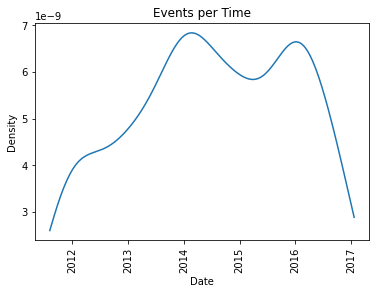

In [ ]:
pm4py.view_events_per_time_graph(win_filtered_event_log)

/content/notebooks/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


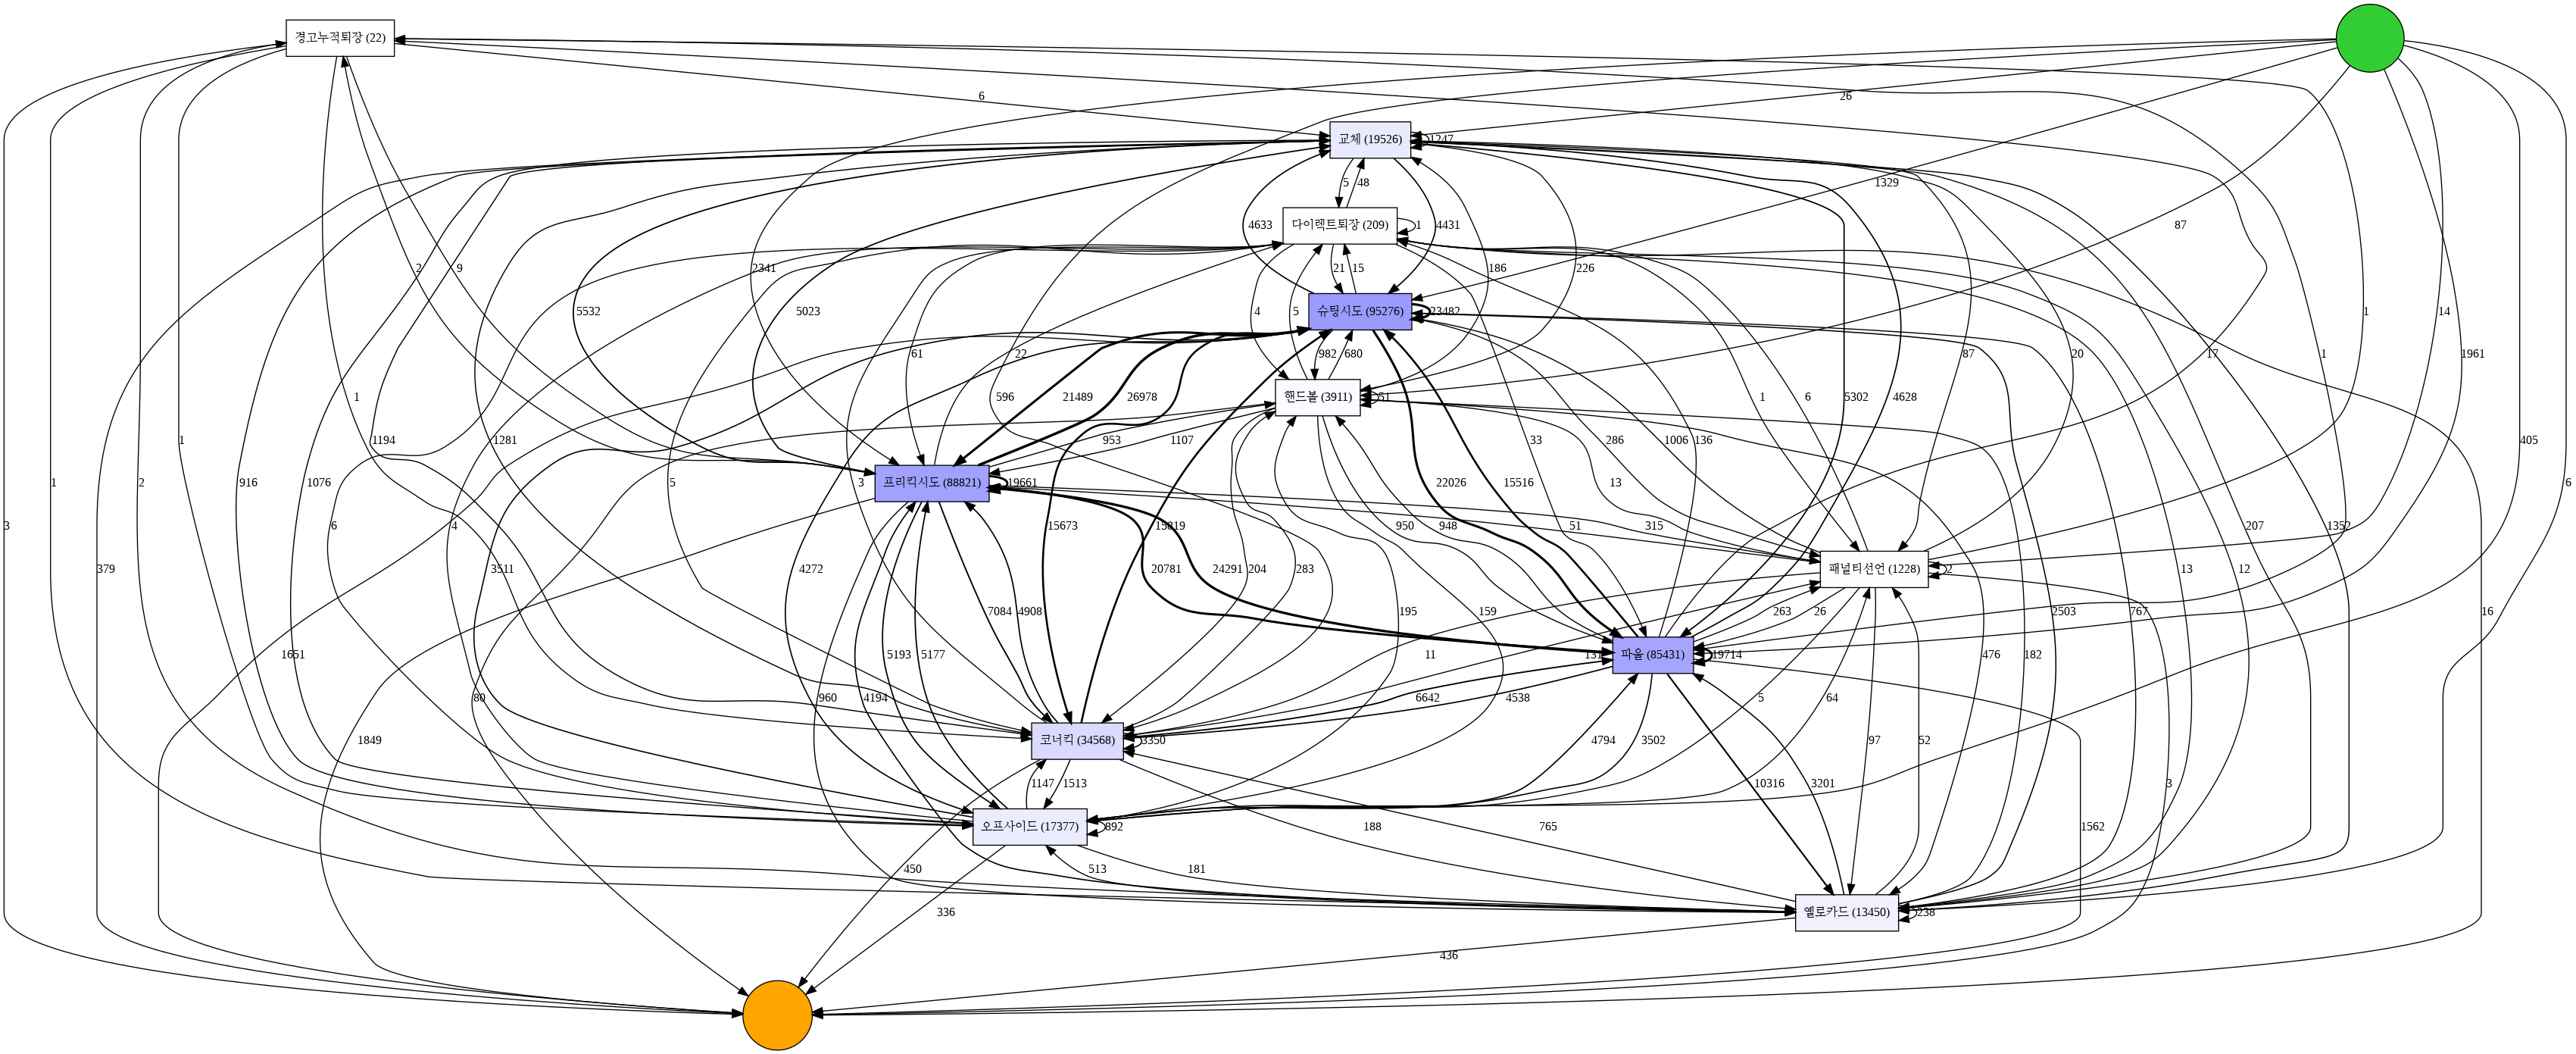

In [ ]:
rel_win_filtered, start_win_filtered, final_win_filtered = pm4py.discover_dfg(win_filtered_event_log)
pm4py.view_dfg(rel_win_filtered, start_win_filtered, final_win_filtered)

/content/notebooks/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


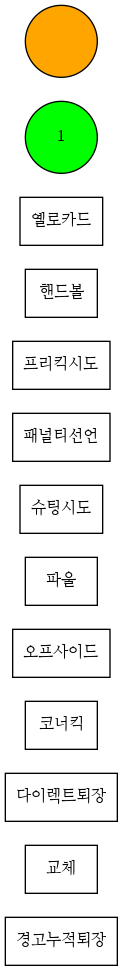

In [ ]:
net_win_filtered, im_win_filtered, fm_win_filtered = pm4py.discover_petri_net_alpha(win_filtered_event_log)
pm4py.view_petri_net(net_win_filtered, im_win_filtered, fm_win_filtered)

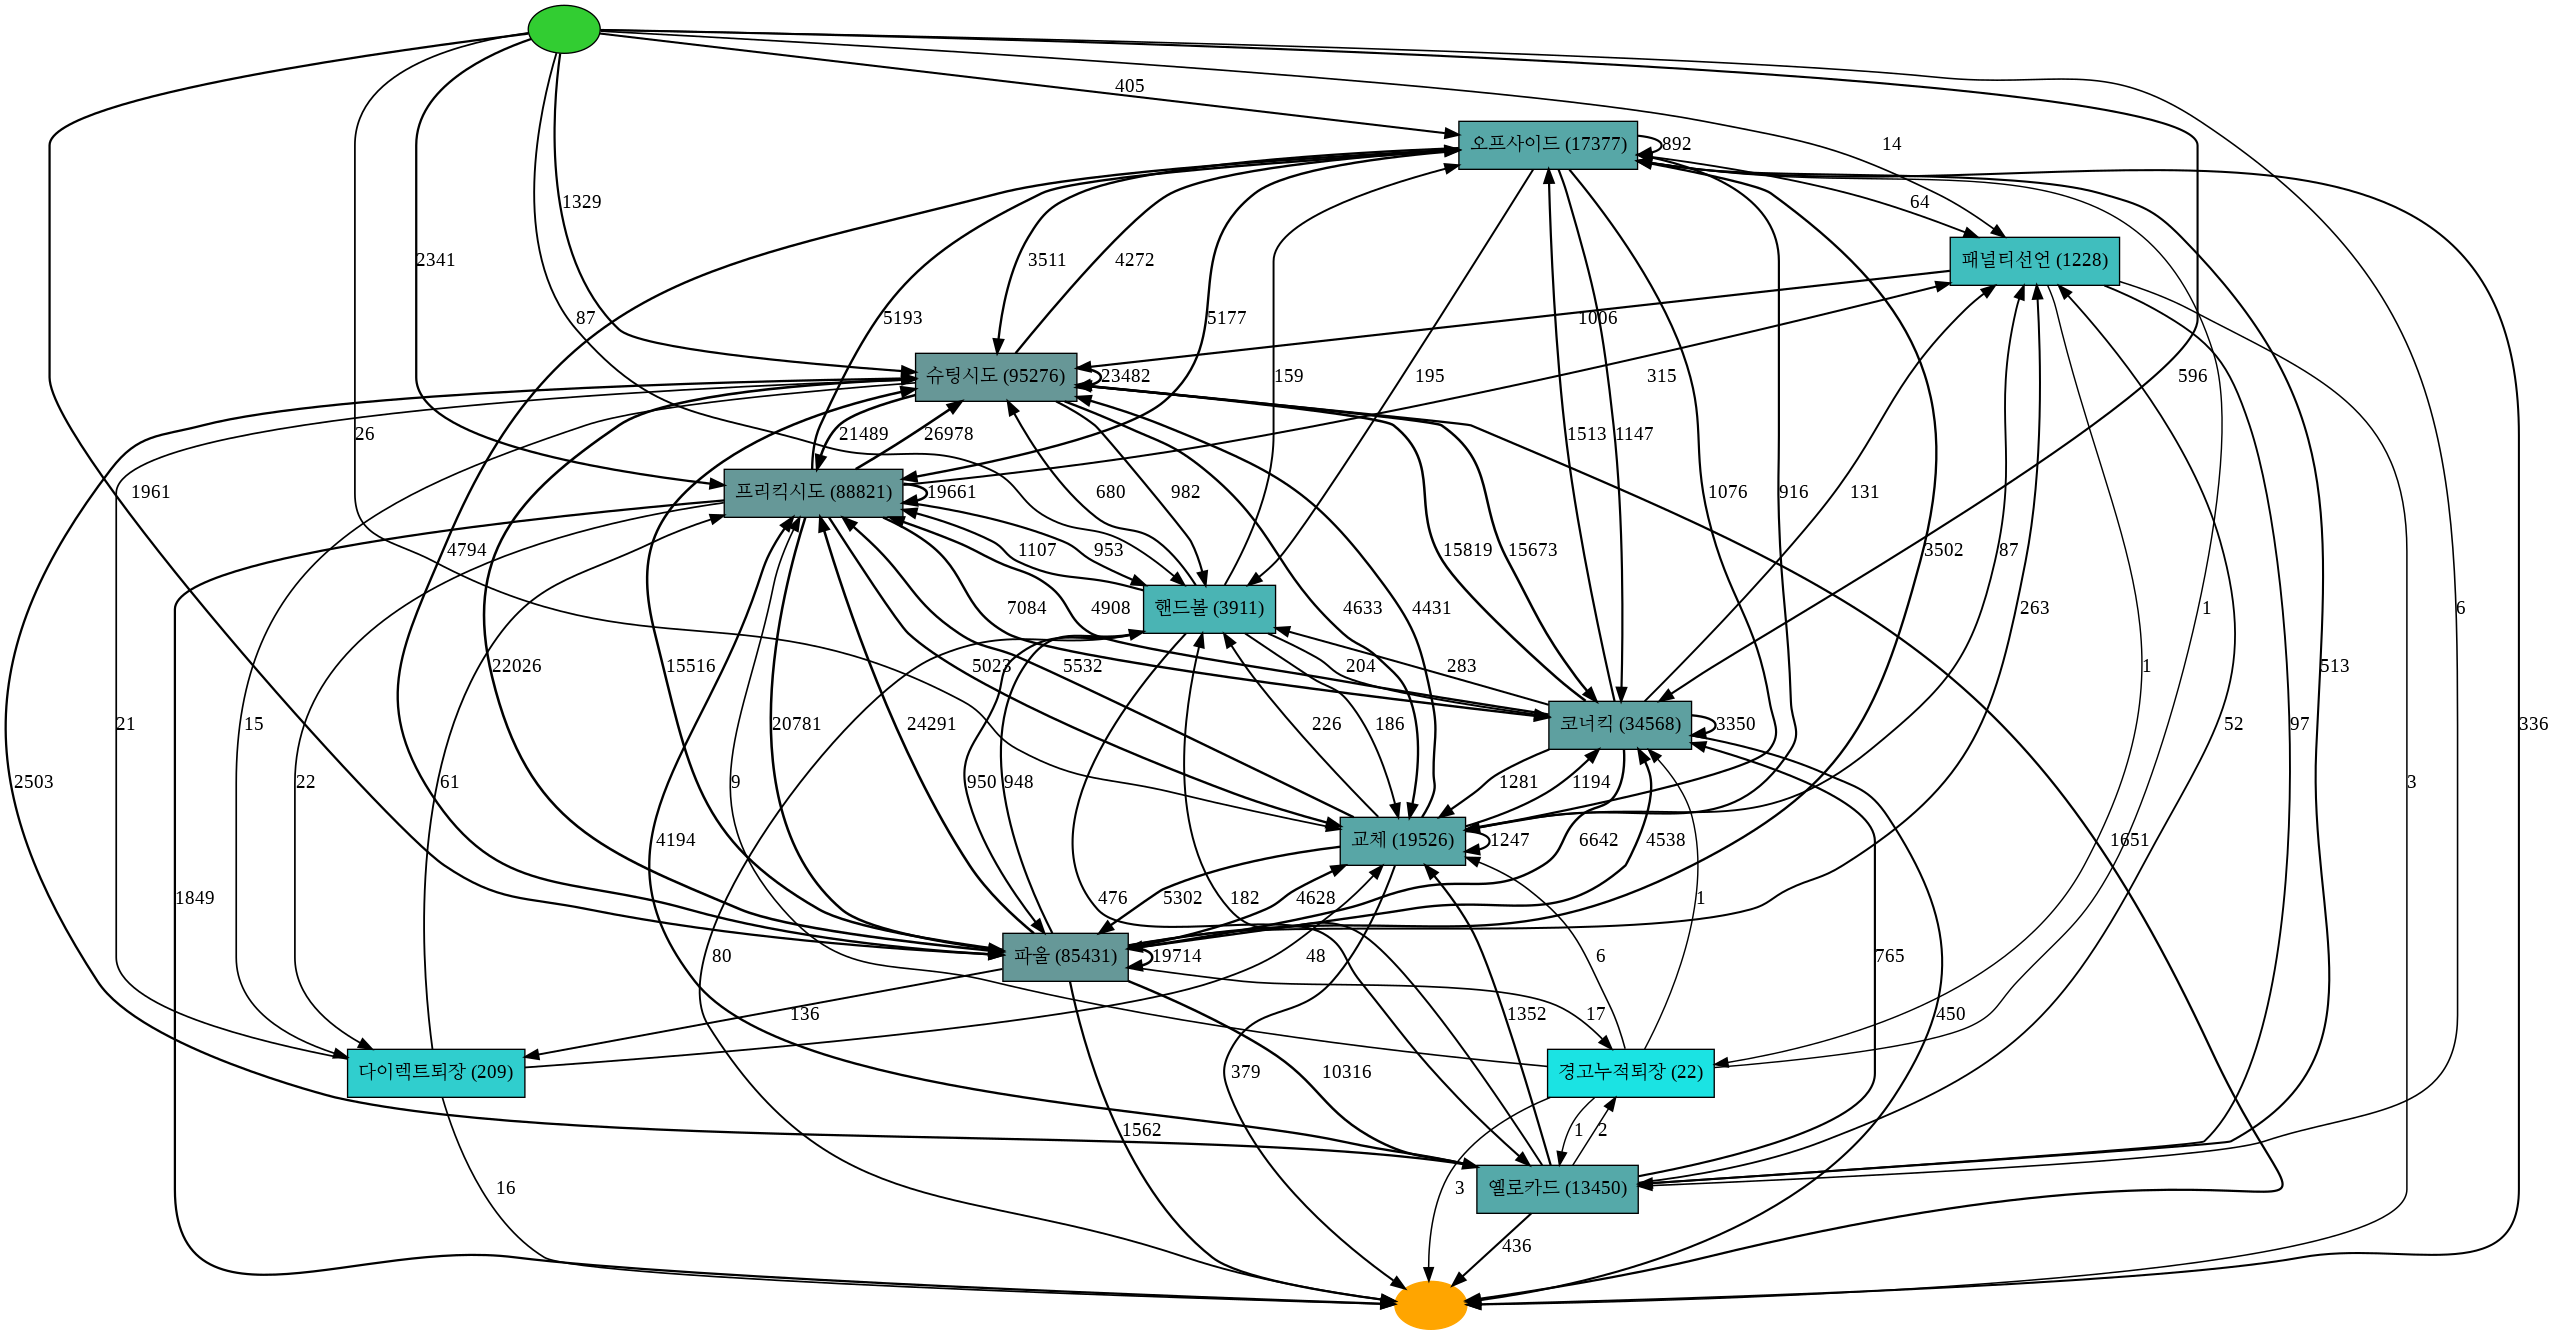

In [ ]:
heu_model_win_filtered = pm4py.discover_heuristics_net(win_filtered_event_log)
pm4py.view_heuristics_net(heu_model_win_filtered)

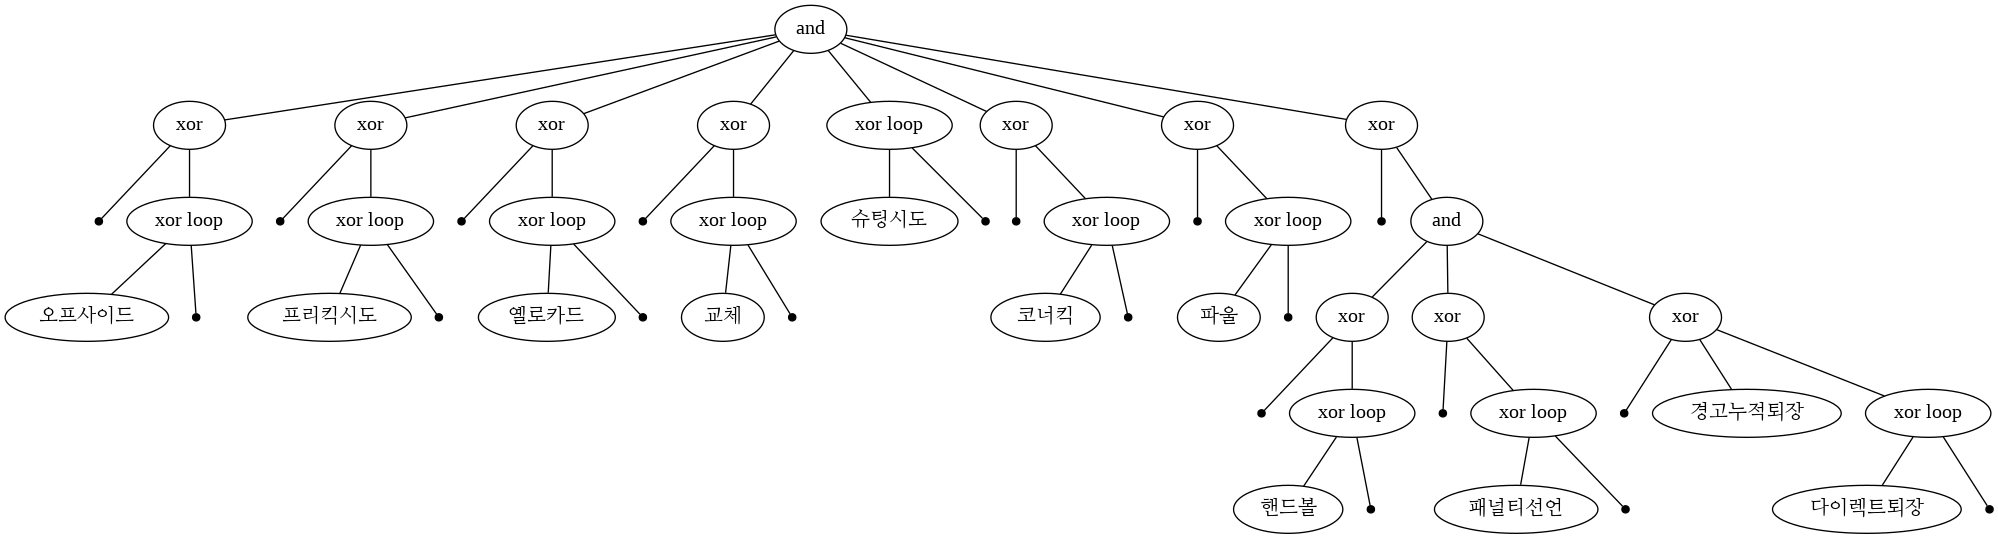

In [ ]:
tree_win_filtered = pm4py.discover_process_tree_inductive(win_filtered_event_log)
pm4py.view_process_tree(tree_win_filtered)

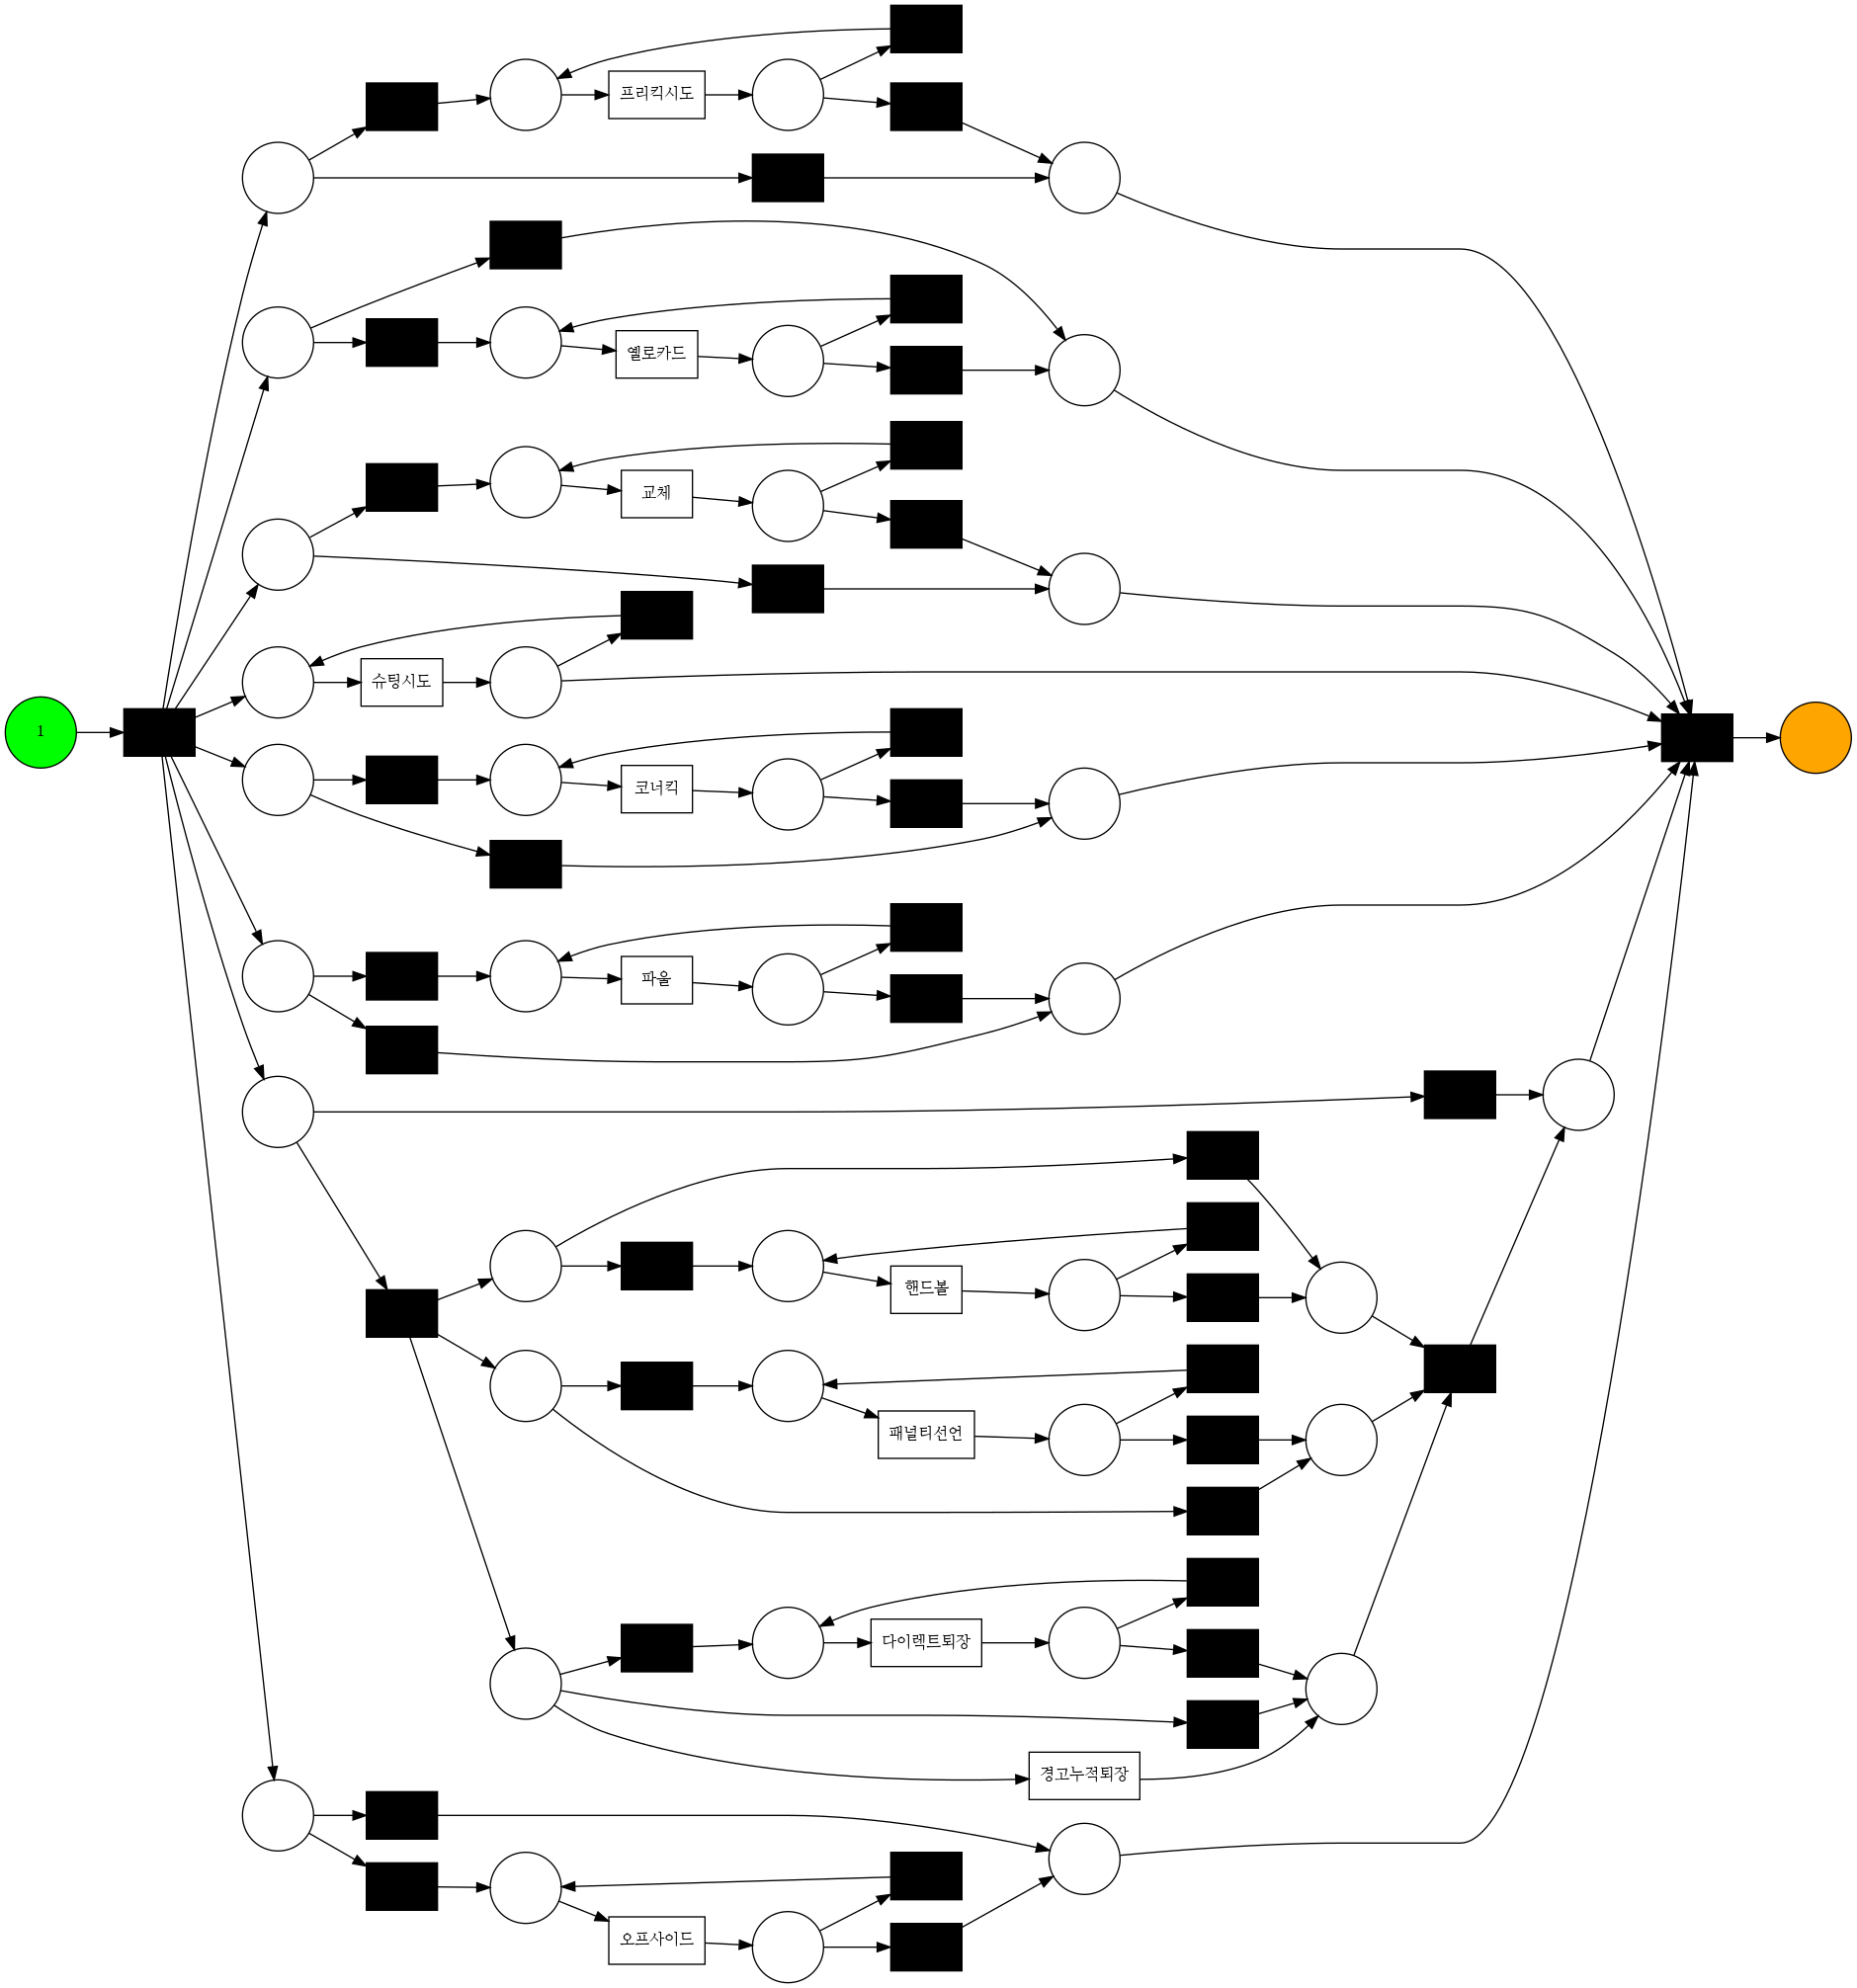

In [ ]:
net2_win_filtered, im2_win_filtered, fm2_win_filtered = pm4py.convert_to_petri_net(tree_win_filtered)
pm4py.view_petri_net(net2_win_filtered, im2_win_filtered, fm2_win_filtered)

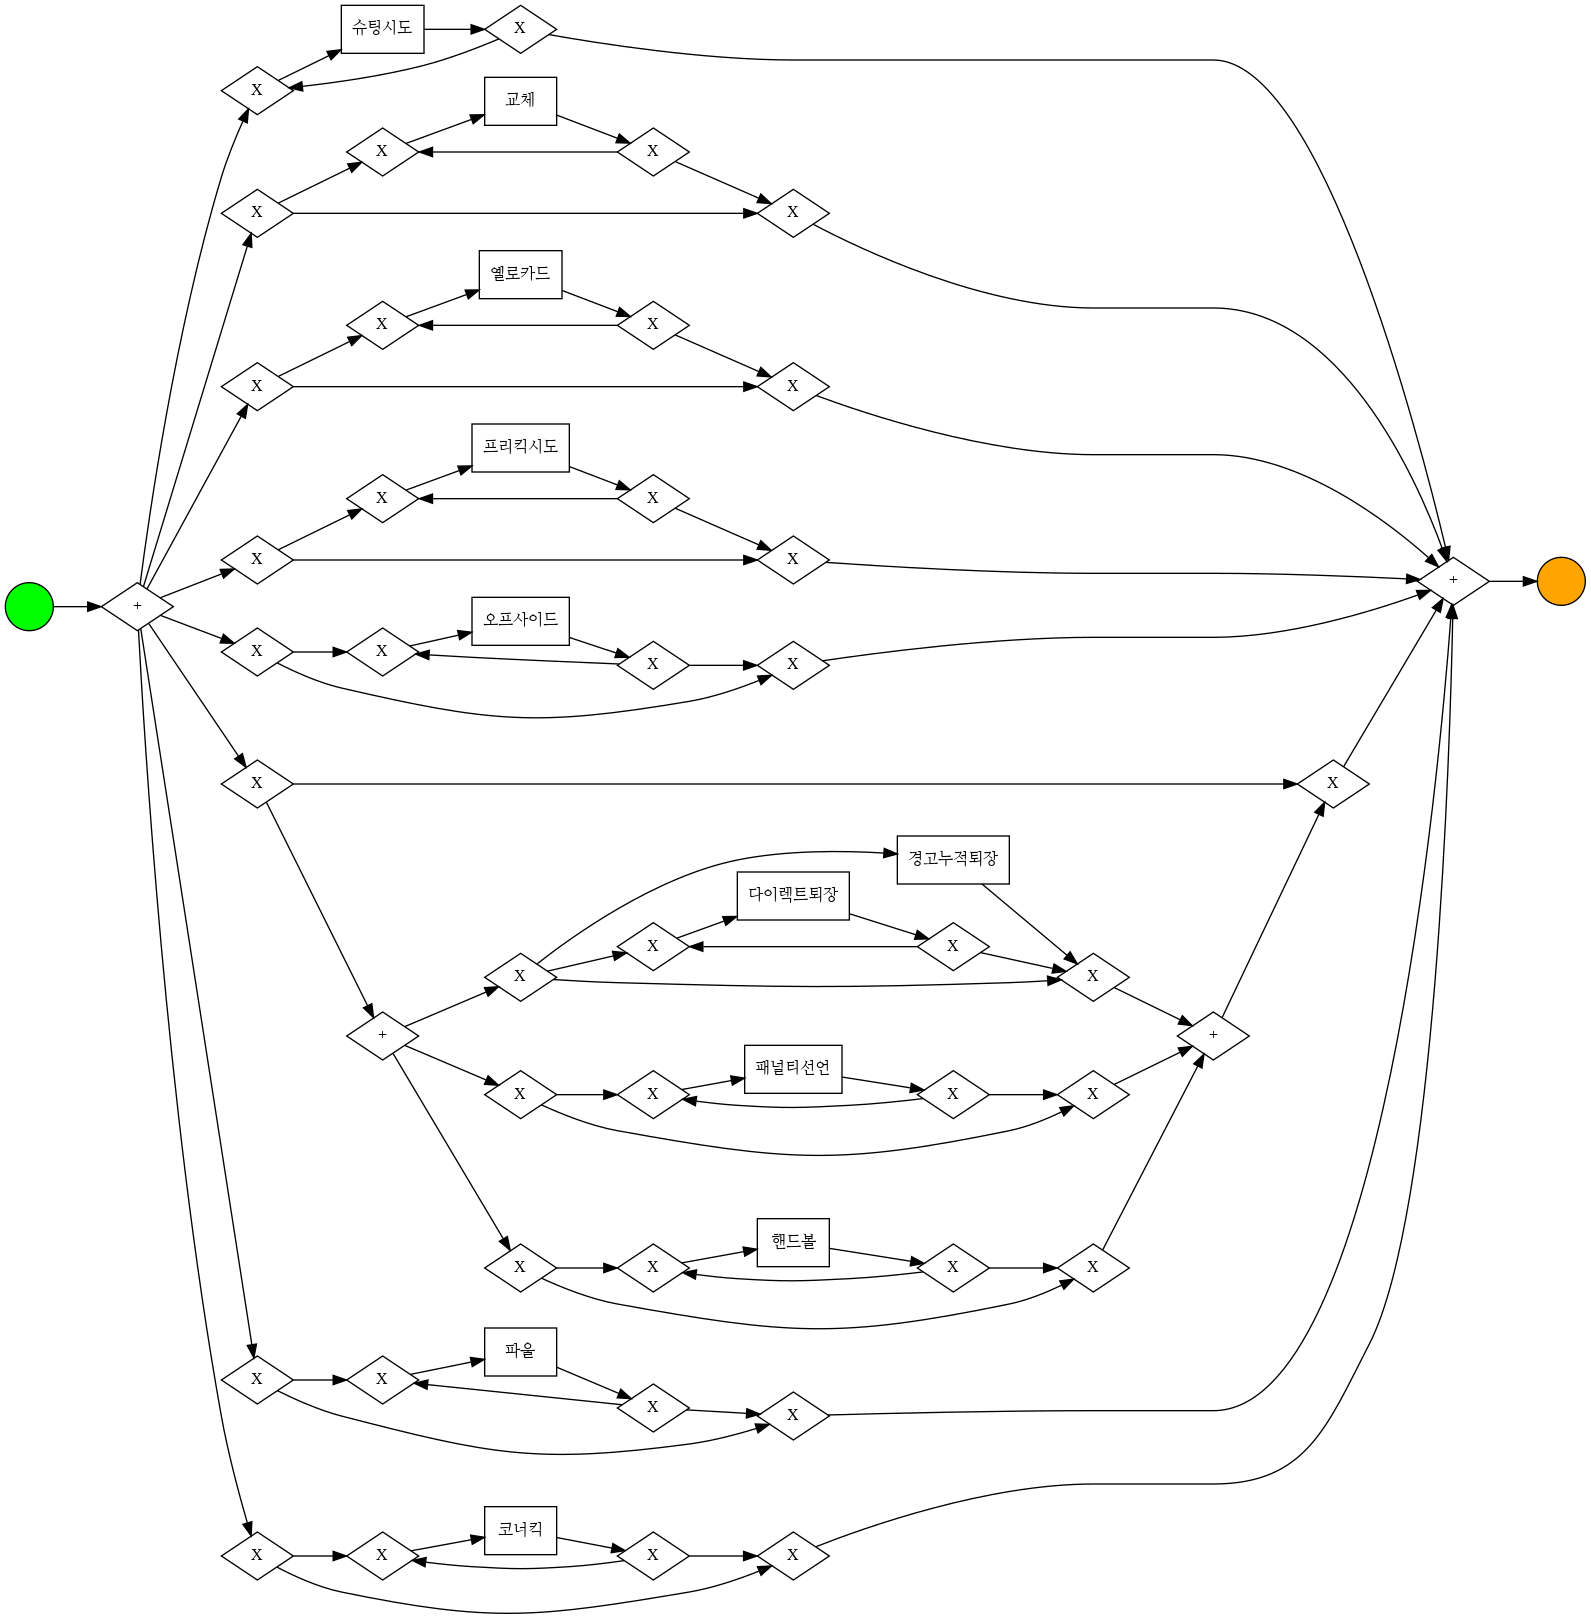

In [ ]:
bpmn_win_filtered = pm4py.discover_bpmn_inductive(win_filtered_event_log)
pm4py.view_bpmn(bpmn_win_filtered)

In [ ]:
token_replay(win_filtered_event_log, net_win_filtered, im_win_filtered, fm_win_filtered)

In [ ]:
net, im, fm = heuristics_miner.apply(win_filtered_event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
token_replay(win_filtered_event_log, net, im, fm)

In [ ]:
net, im, fm = inductive_miner.apply(win_filtered_event_log)
token_replay(win_filtered_event_log, net, im, fm)

## 패배팀

In [ ]:
lose_filtered_event_log = pm4py.filter_event_attribute_values(event_log_pm4py, 'result', {'패'}, level='event')
basic_data_analysis(lose_filtered_event_log)
lose_filtered_event_log

Number of events: 340184
Number of cases: 6765
Start activities: {'파울': 2379, '프리킥시도': 2278, '슈팅시도': 1062, '코너킥': 489, '오프사이드': 393, '핸드볼': 92, '교체': 52, '옐로카드': 10, '패널티선언': 9, '다이렉트퇴장': 1}
End activities: {'파울': 1957, '슈팅시도': 1739, '프리킥시도': 1467, '옐로카드': 528, '코너킥': 520, '오프사이드': 319, '교체': 87, '핸드볼': 86, '다이렉트퇴장': 43, '패널티선언': 14, '경고누적퇴장': 5}
Mean of case durations: 0.06


case:concept:name  ...           start_timestamp
71852   12 AC Ajaccio vs AJ Auxerre  ... 2012-01-14 00:04:00+00:00
71853   12 AC Ajaccio vs AJ Auxerre  ... 2012-01-14 00:05:00+00:00
71856   12 AC Ajaccio vs AJ Auxerre  ... 2012-01-14 00:06:00+00:00
71858   12 AC Ajaccio vs AJ Auxerre  ... 2012-01-14 00:07:00+00:00
71861   12 AC Ajaccio vs AJ Auxerre  ... 2012-01-14 00:10:00+00:00
...                             ...  ...                       ...
853858       17 West Ham vs Watford  ... 2016-09-10 01:28:00+00:00
853860       17 West Ham vs Watford  ... 2016-09-10 01:30:00+00:00
853861       17 West Ham vs Watford  ... 2016-09-10 01:31:00+00:00
853862       17 West Ham vs Watford  ... 2016-09-10 01:32:00+00:00
853864       17 West Ham vs Watford  ... 2016-09-10 01:34:00+00:00

[340184 rows x 28 columns]

In [ ]:
pm4py.view_dotted_chart(lose_filtered_event_log)

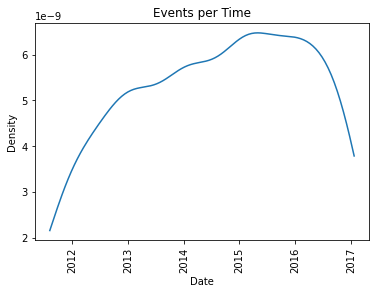

In [ ]:
pm4py.view_events_per_time_graph(lose_filtered_event_log)

/content/notebooks/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


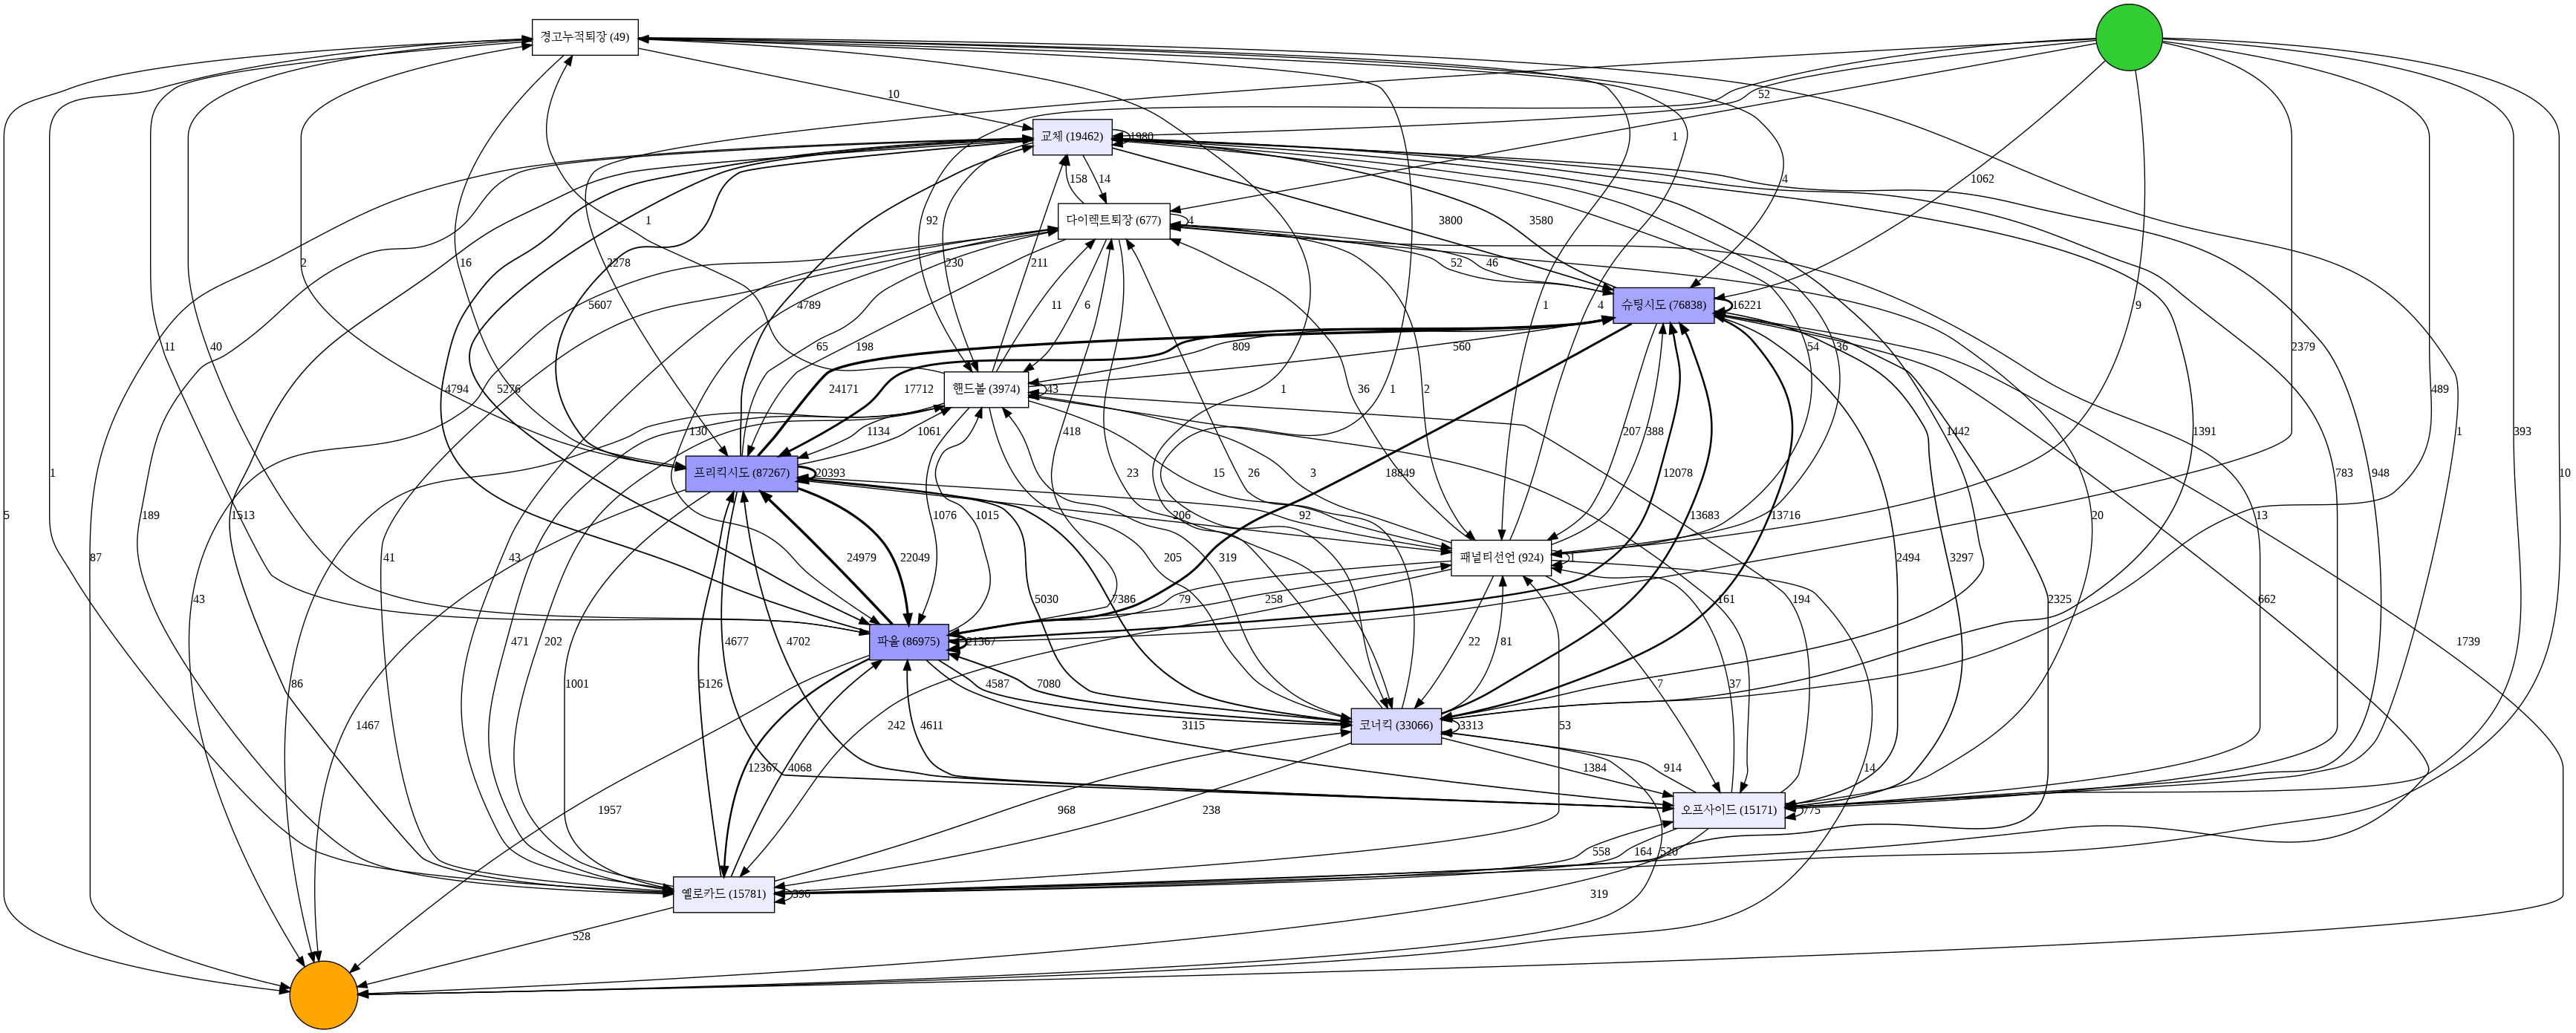

In [ ]:
rel_lose_filtered, start_lose_filtered, final_lose_filtered = pm4py.discover_dfg(lose_filtered_event_log)
pm4py.view_dfg(rel_lose_filtered, start_lose_filtered, final_lose_filtered)

/content/notebooks/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


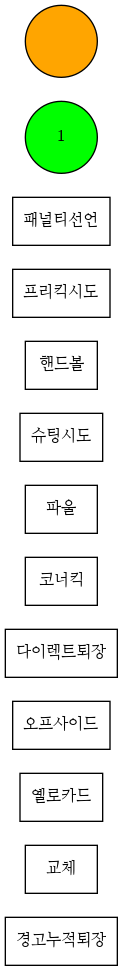

In [ ]:
net_lose_filtered, im_lose_filtered, fm_lose_filtered = pm4py.discover_petri_net_alpha(lose_filtered_event_log)
pm4py.view_petri_net(net_lose_filtered, im_lose_filtered, fm_lose_filtered)

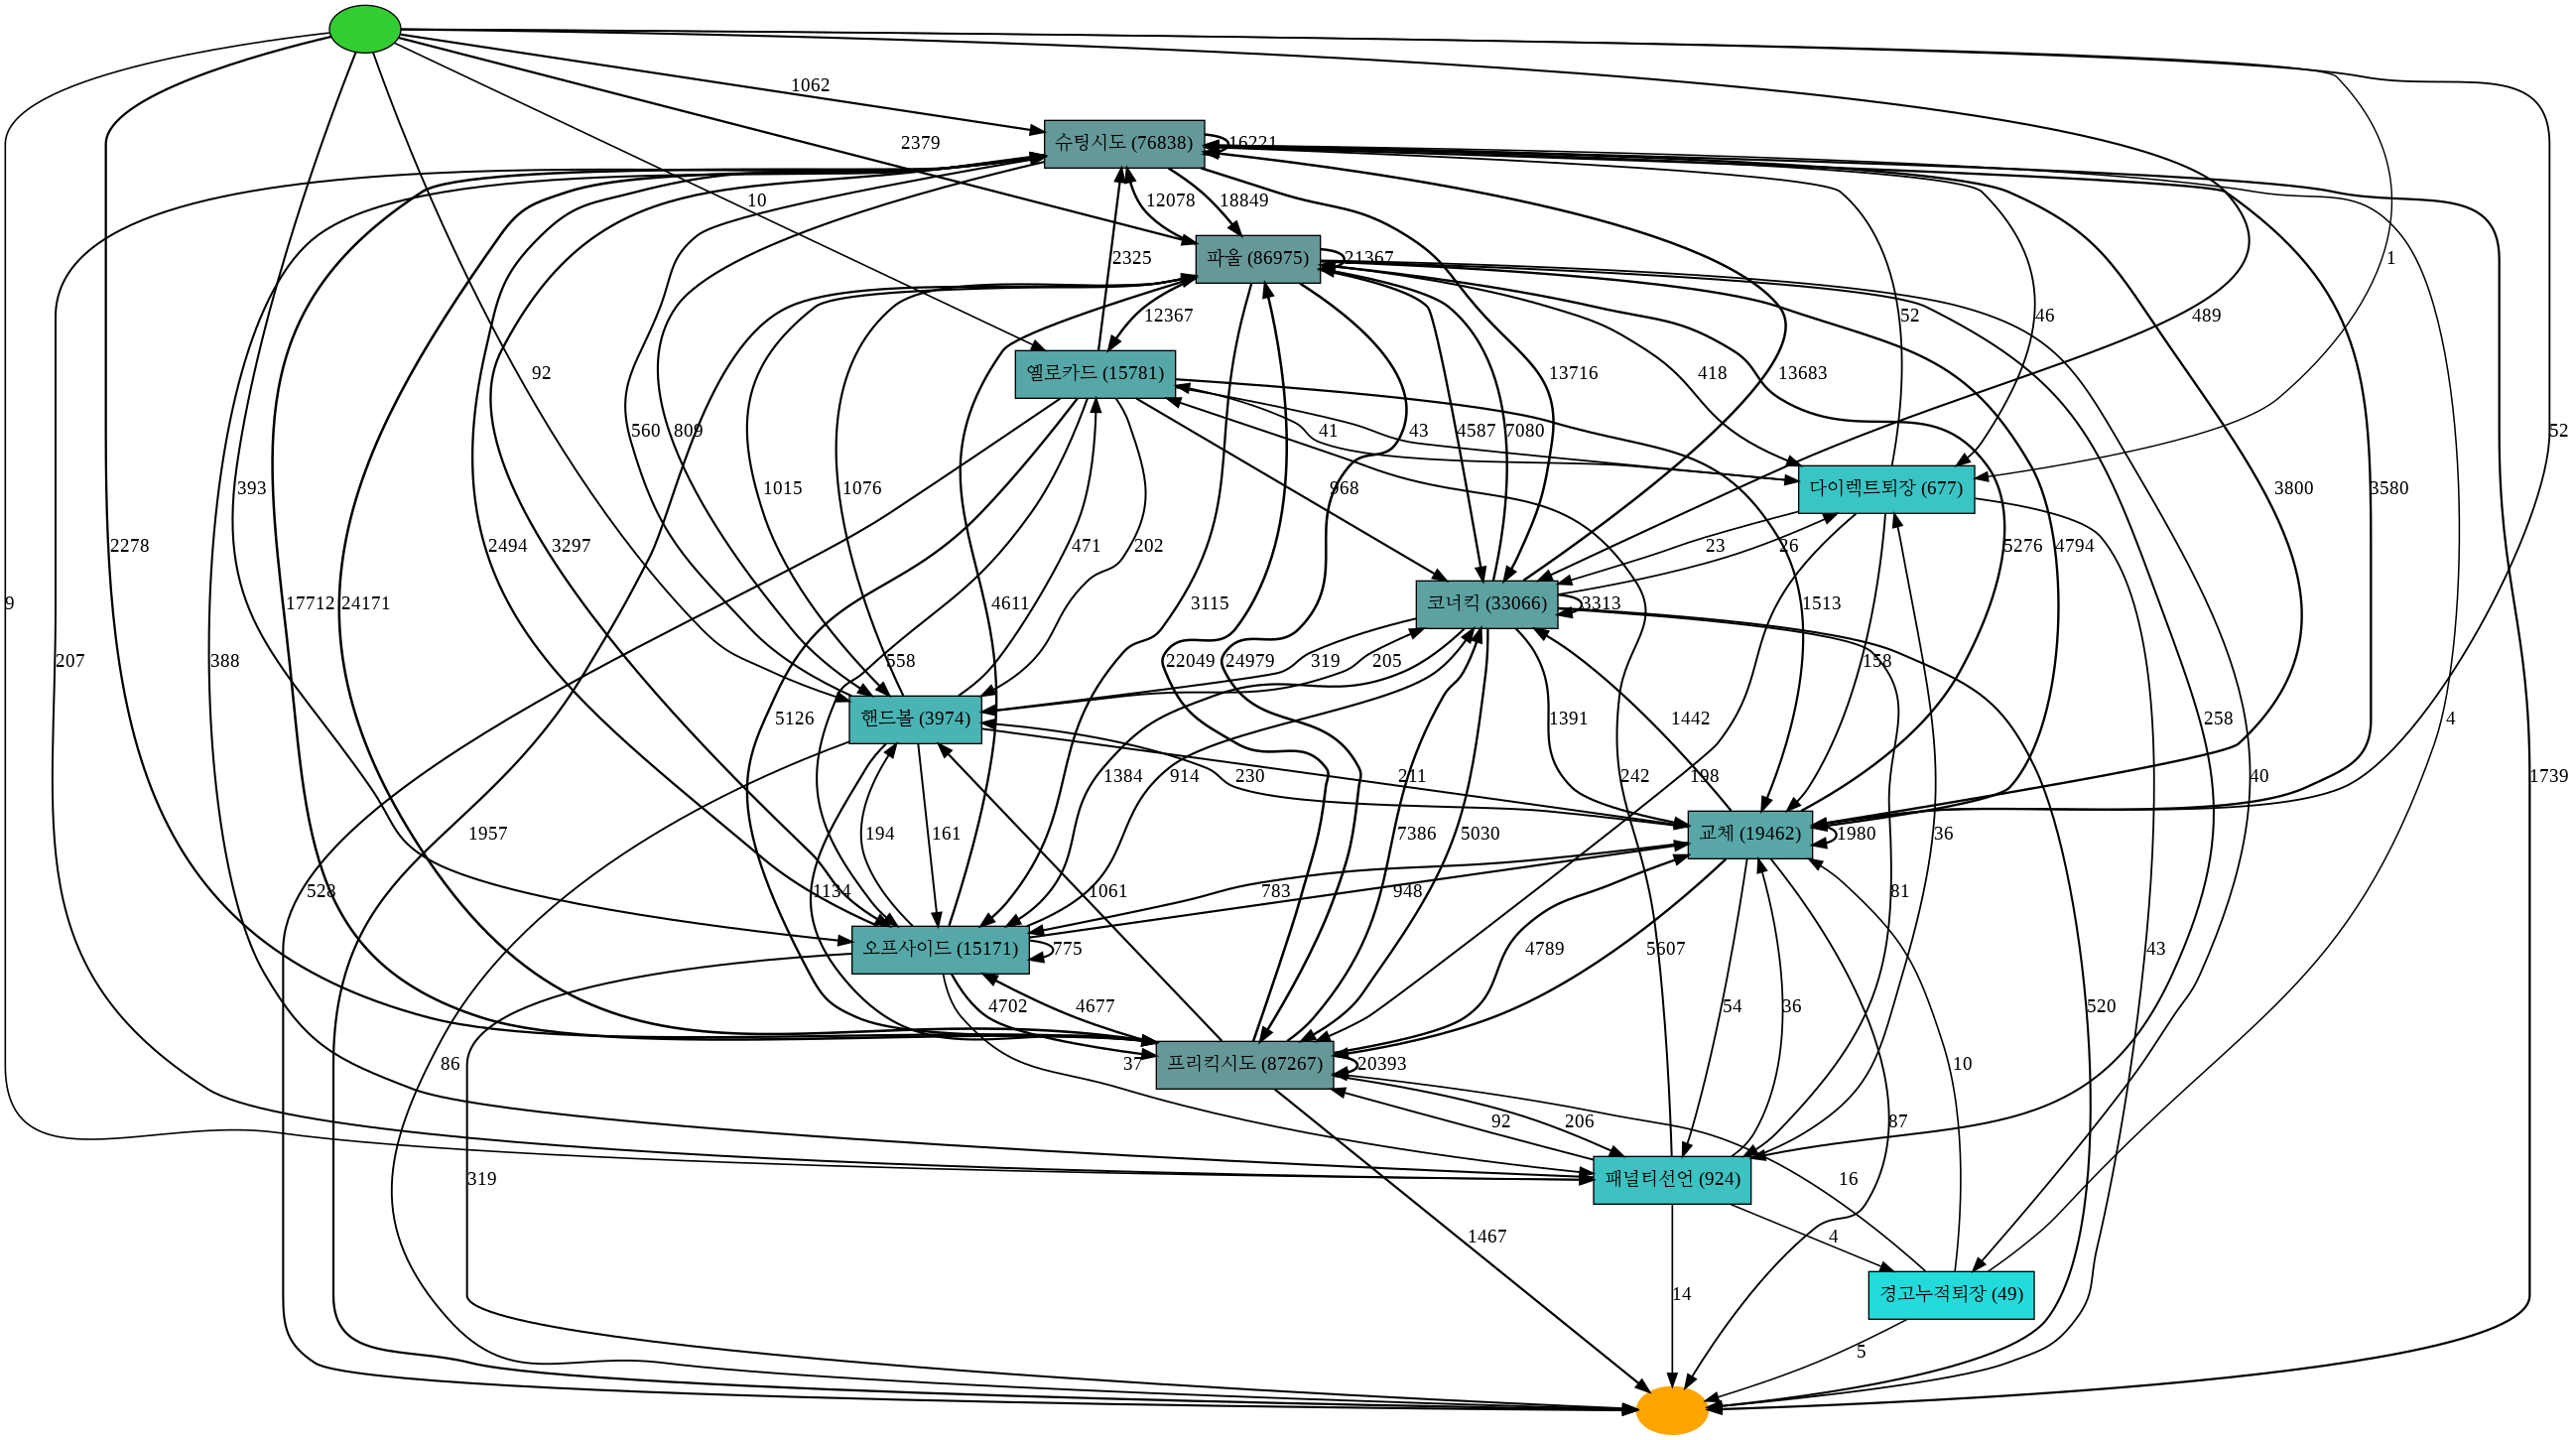

In [ ]:
heu_model_lose_filtered = pm4py.discover_heuristics_net(lose_filtered_event_log)
pm4py.view_heuristics_net(heu_model_lose_filtered)

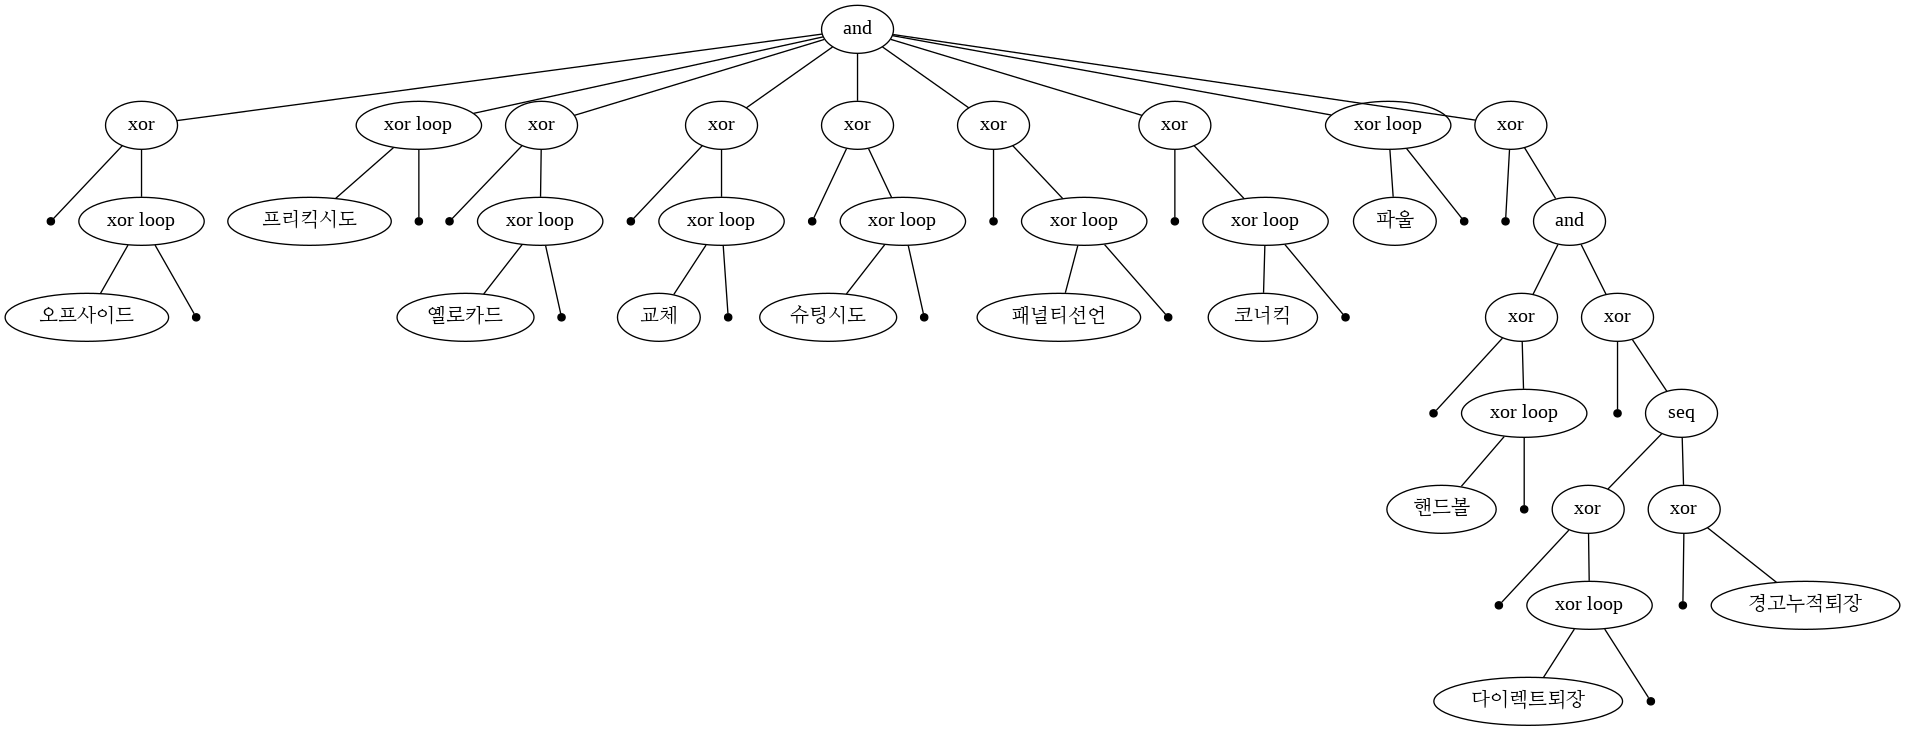

In [ ]:
tree_lose_filtered = pm4py.discover_process_tree_inductive(lose_filtered_event_log)
pm4py.view_process_tree(tree_lose_filtered)

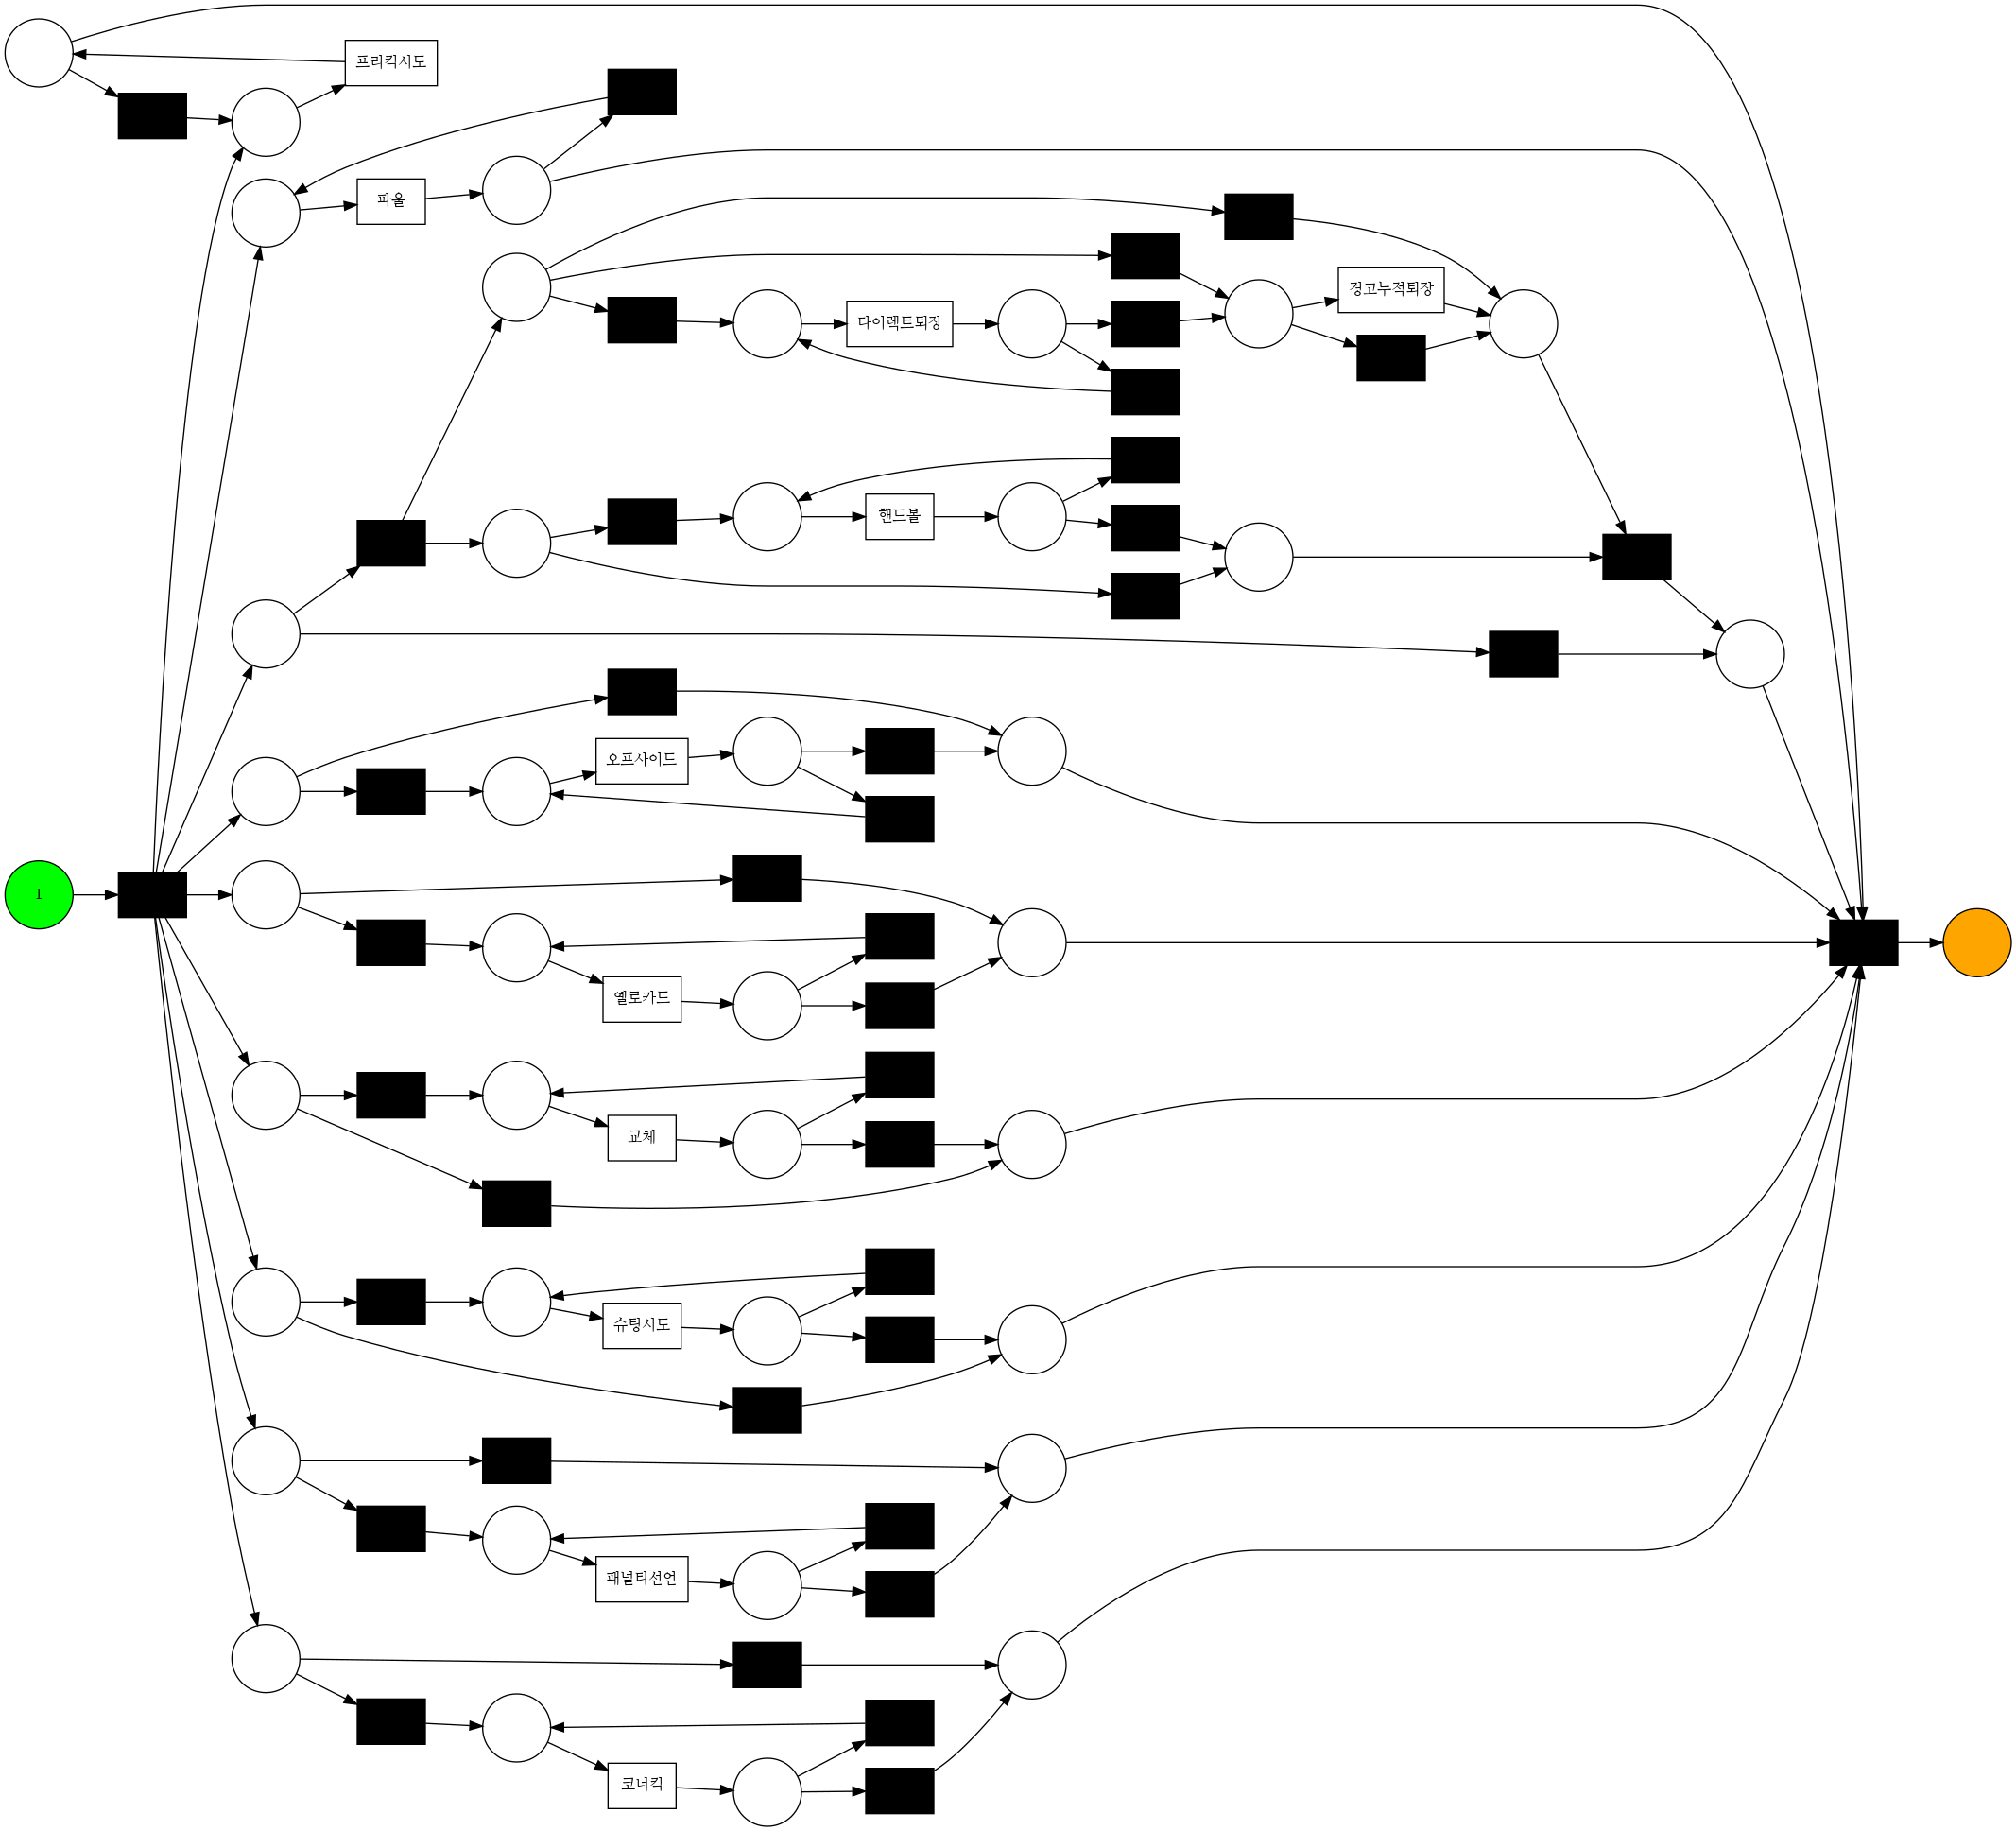

In [ ]:
net2_lose_filtered, im2_lose_filtered, fm2_lose_filtered = pm4py.convert_to_petri_net(tree_lose_filtered)
pm4py.view_petri_net(net2_lose_filtered, im2_lose_filtered, fm2_lose_filtered)

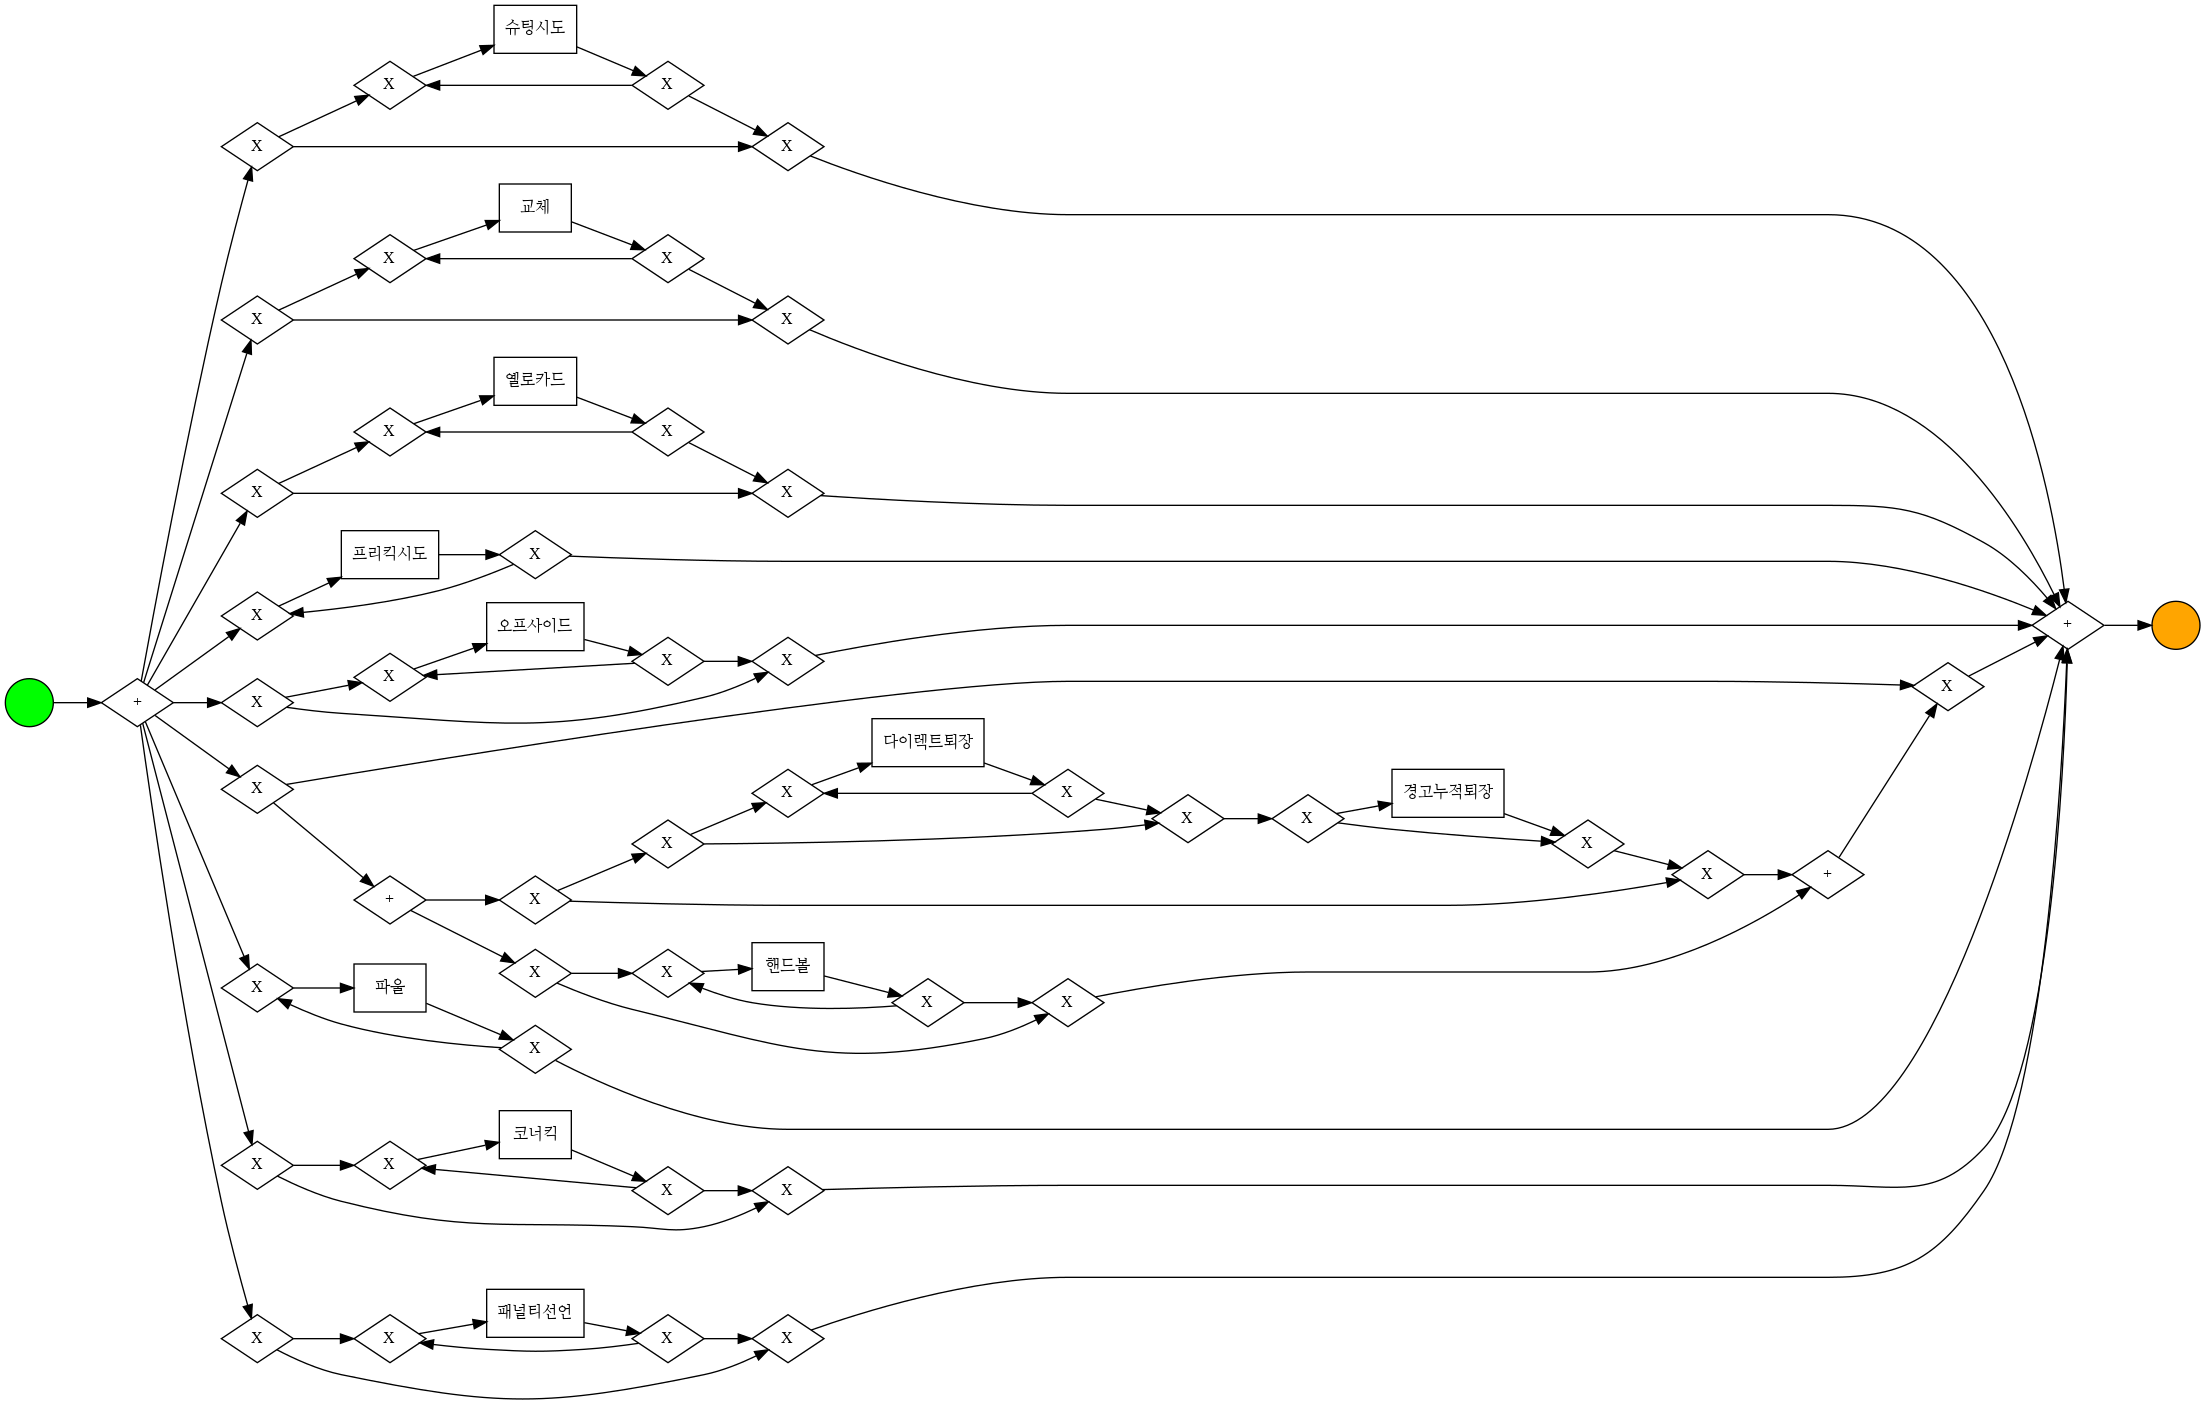

In [ ]:
bpmn_lose_filtered = pm4py.discover_bpmn_inductive(lose_filtered_event_log)
pm4py.view_bpmn(bpmn_lose_filtered)

In [ ]:
token_replay(lose_filtered_event_log, net_lose_filtered, im_lose_filtered, fm_lose_filtered)

In [ ]:
net, im, fm = heuristics_miner.apply(lose_filtered_event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
token_replay(lose_filtered_event_log, net, im, fm)

In [ ]:
net, im, fm = inductive_miner.apply(lose_filtered_event_log)
token_replay(lose_filtered_event_log, net, im, fm)

## 15, 16시즌 첼시 분석

In [52]:
target_string1 = ['15', 'Chelsea']
target_string2 = ['16', 'Chelsea']
Chelsea_filtered_event_log1=event_log_pm4py[event_log_pm4py['case:concept:name'].map(lambda x: all(string in x for string in target_string1))]
Chelsea_filtered_event_log2=event_log_pm4py[event_log_pm4py['case:concept:name'].map(lambda x: all(string in x for string in target_string2))]
Chelsea_filtered_event_log=pd.concat([Chelsea_filtered_event_log1, Chelsea_filtered_event_log2])
basic_data_analysis(Chelsea_filtered_event_log)
Chelsea_filtered_event_log.head()

Number of events: 7253
Number of cases: 76
Start activities: {'슈팅시도': 28, '파울': 13, '코너킥': 12, '프리킥시도': 12, '교체': 8, '오프사이드': 2, '옐로카드': 1}
End activities: {'슈팅시도': 22, '프리킥시도': 17, '파울': 12, '옐로카드': 10, '코너킥': 6, '오프사이드': 6, '교체': 3}
Mean of case durations: 0.06


case:concept:name   id_event  ...            time:timestamp @@index
637609  15 Arsenal vs Chelsea  EmtzRaCt1  ... 2015-04-26 00:02:00+00:00  637609
637610  15 Arsenal vs Chelsea  EmtzRaCt2  ... 2015-04-26 00:02:00+00:00  637610
637611  15 Arsenal vs Chelsea  EmtzRaCt3  ... 2015-04-26 00:02:00+00:00  637611
637612  15 Arsenal vs Chelsea  EmtzRaCt4  ... 2015-04-26 00:02:00+00:00  637612
637613  15 Arsenal vs Chelsea  EmtzRaCt5  ... 2015-04-26 00:03:00+00:00  637613

[5 rows x 27 columns]

In [53]:
for i in range(len(Chelsea_filtered_event_log)):
  if Chelsea_filtered_event_log["event_team"].iloc[i] == 'Chelsea' :
    Chelsea_filtered_event_log["concept:name"].iloc[i] = '첼시의'+ Chelsea_filtered_event_log["concept:name"].iloc[i]
  else :
     Chelsea_filtered_event_log["concept:name"].iloc[i] = '상대편의'+ Chelsea_filtered_event_log["concept:name"].iloc[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [54]:
Chelsea_filtered_event_log['case:concept:name'].unique()

array(['15 Arsenal vs Chelsea', '15 Aston Villa vs Chelsea',
       '15 Burnley vs Chelsea', '15 Chelsea vs Arsenal',
       '15 Chelsea vs Aston Villa', '15 Chelsea vs Burnley',
       '15 Chelsea vs Crystal Palace', '15 Chelsea vs Everton',
       '15 Chelsea vs Hull', '15 Chelsea vs Leicester City',
       '15 Chelsea vs Liverpool', '15 Chelsea vs Manchester City',
       '15 Chelsea vs Manchester Utd', '15 Chelsea vs Newcastle',
       '15 Chelsea vs QPR', '15 Chelsea vs Southampton',
       '15 Chelsea vs Stoke City', '15 Chelsea vs Sunderland',
       '15 Chelsea vs Swansea', '15 Chelsea vs Tottenham',
       '15 Chelsea vs West Brom', '15 Chelsea vs West Ham',
       '15 Crystal Palace vs Chelsea', '15 Everton vs Chelsea',
       '15 Hull vs Chelsea', '15 Leicester City vs Chelsea',
       '15 Liverpool vs Chelsea', '15 Manchester City vs Chelsea',
       '15 Manchester Utd vs Chelsea', '15 Newcastle vs Chelsea',
       '15 QPR vs Chelsea', '15 Southampton vs Chelsea',
       '1

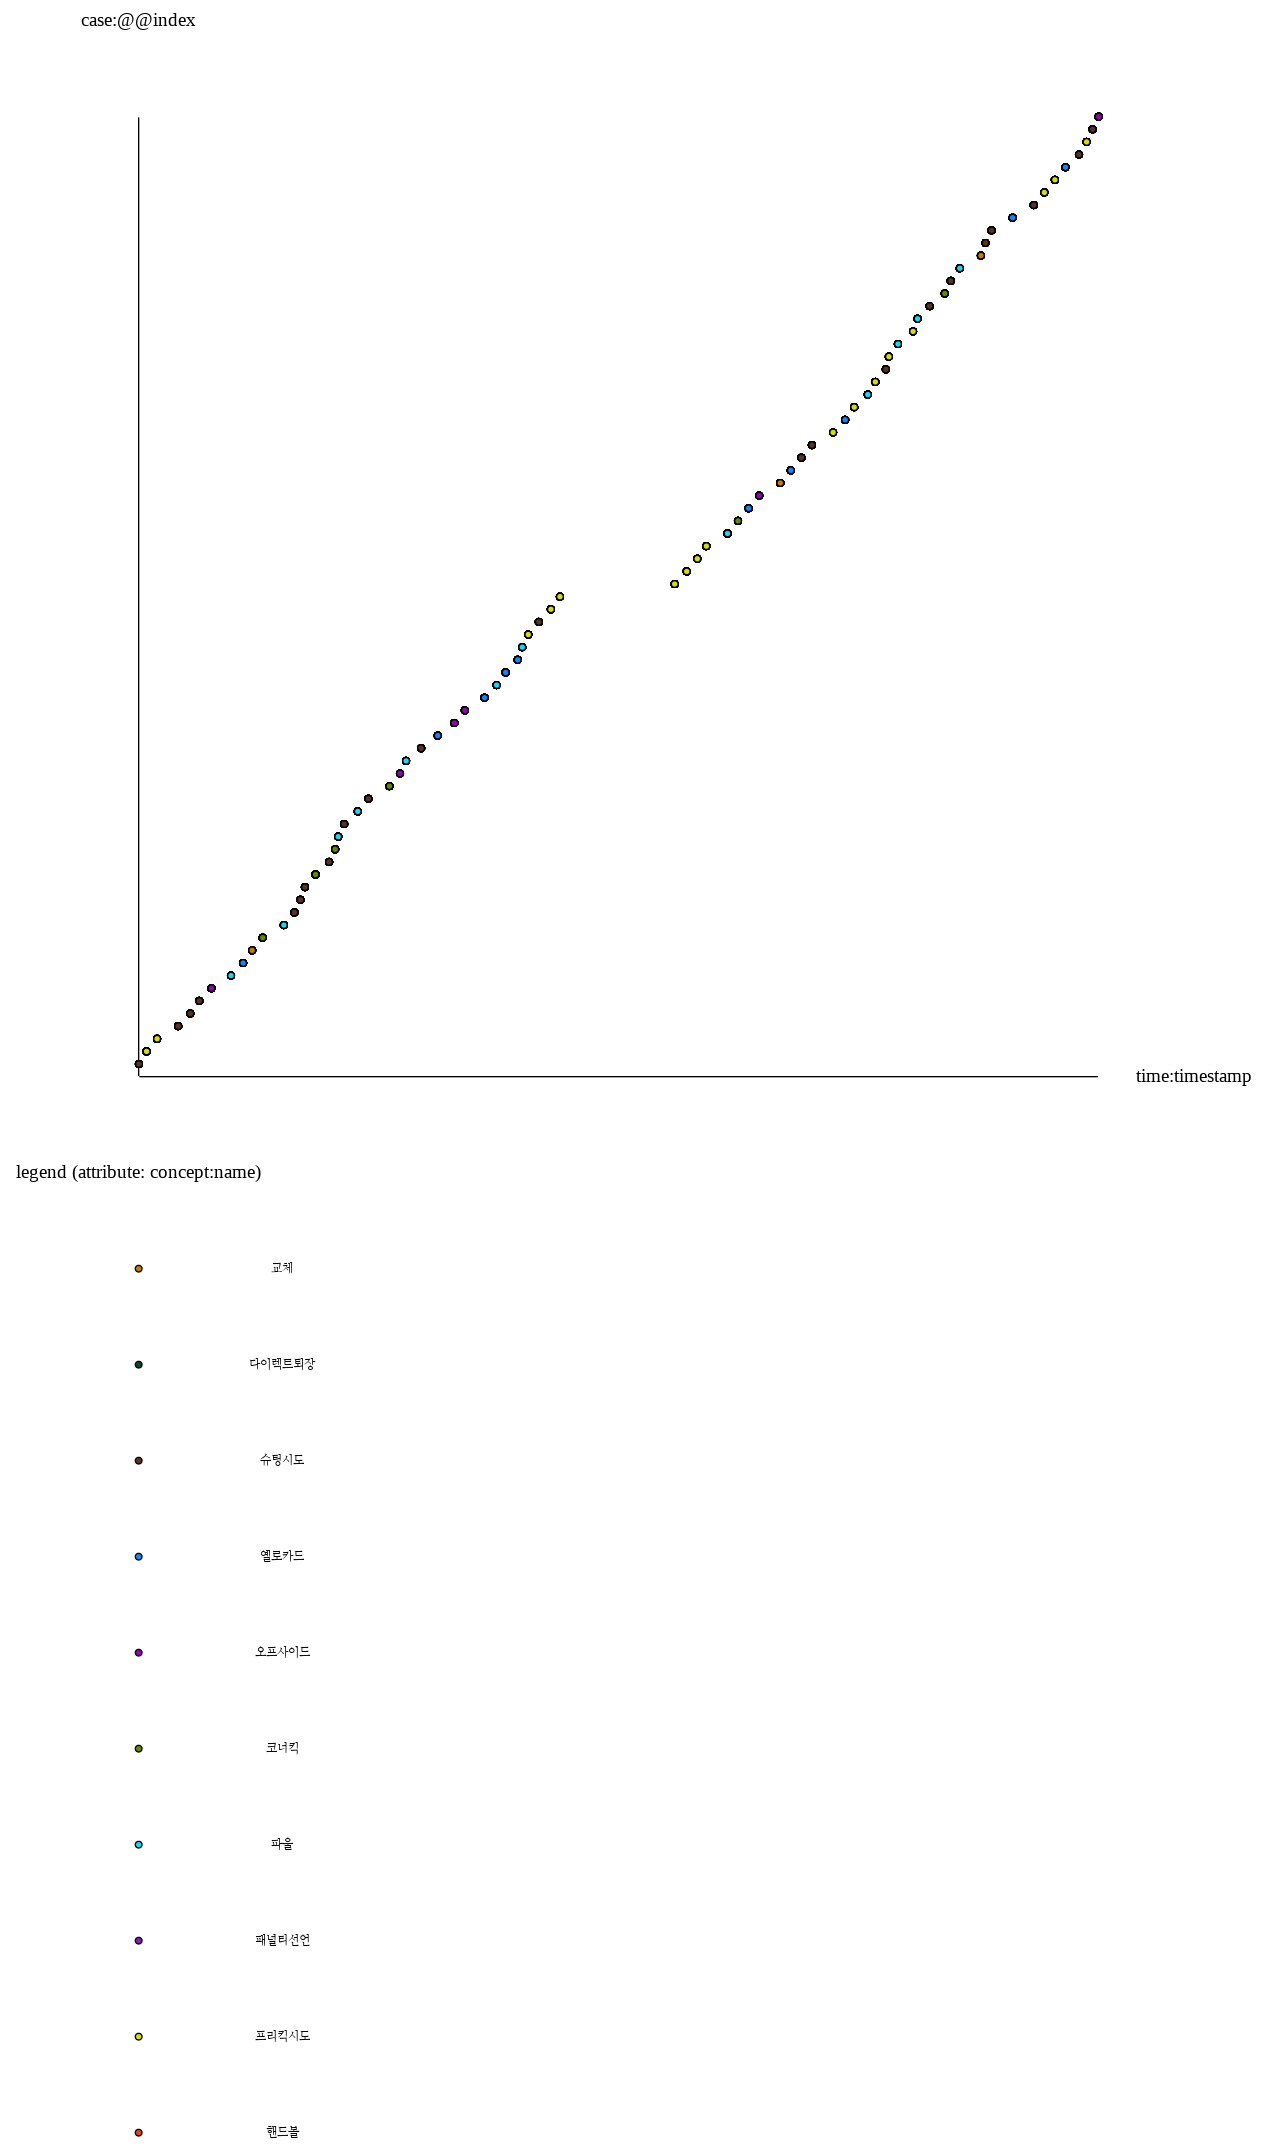

In [ ]:
pm4py.view_dotted_chart(Chelsea_filtered_event_log)

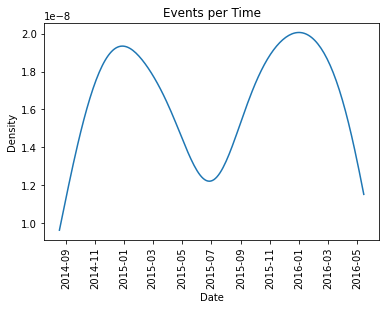

In [ ]:
pm4py.view_events_per_time_graph(Chelsea_filtered_event_log)

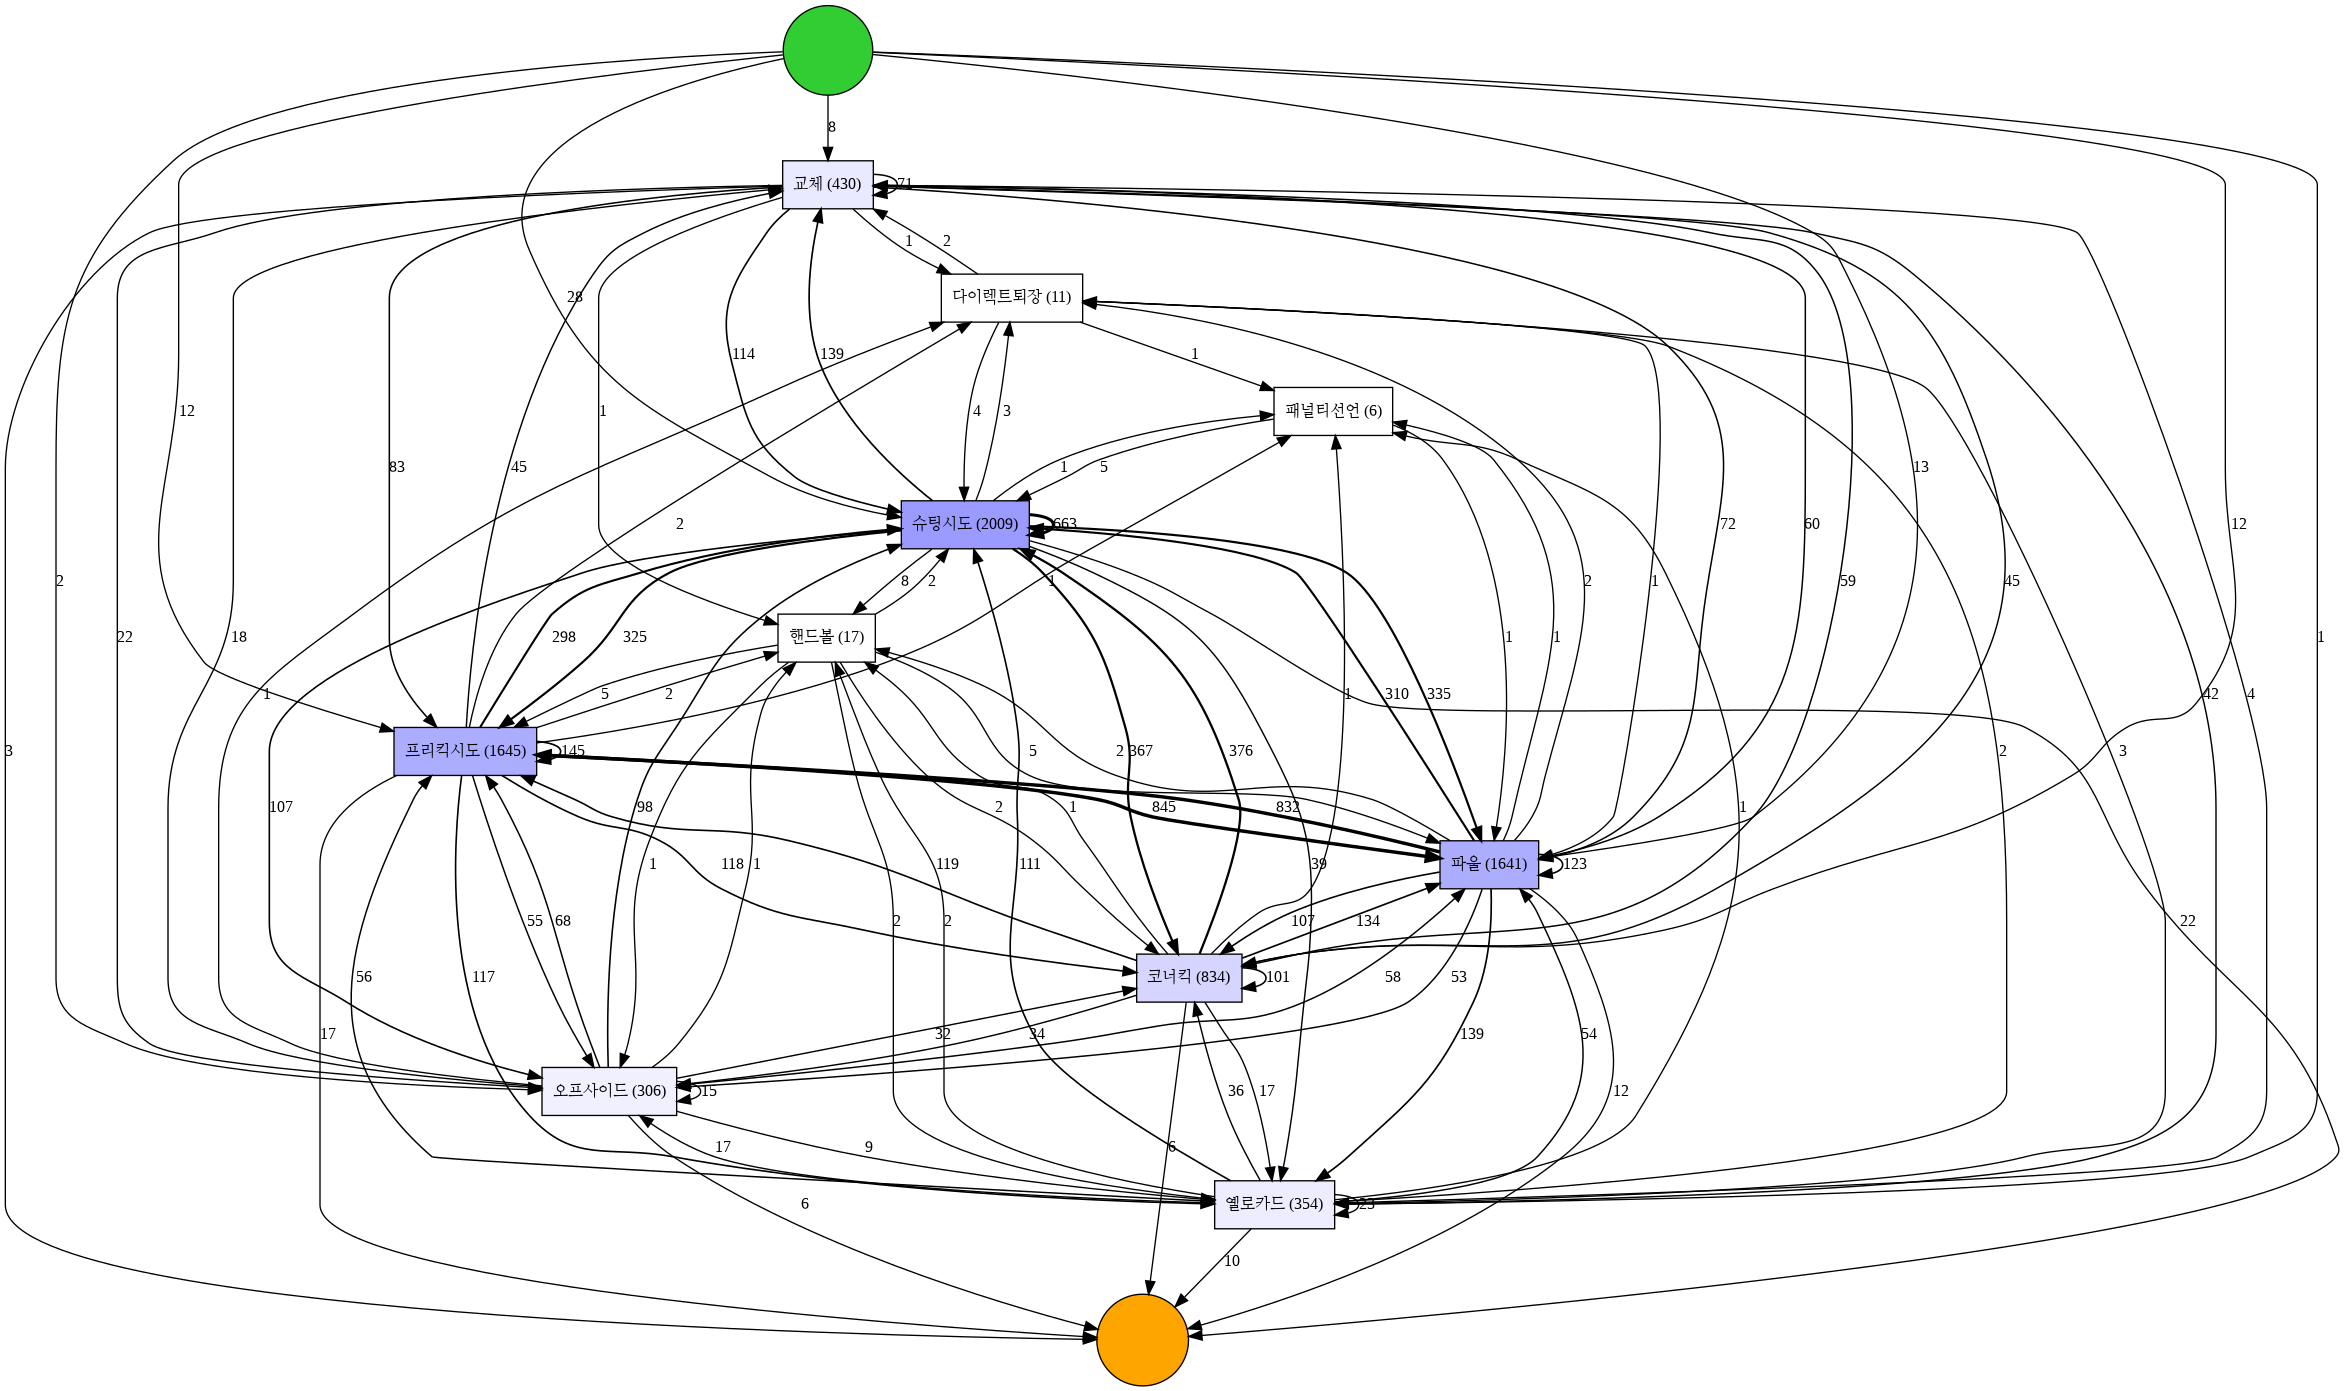

In [ ]:
rel_Chelsea_filtered, start_Chelsea_filtered, final_Chelsea_filtered = pm4py.discover_dfg(Chelsea_filtered_event_log)
pm4py.view_dfg(rel_Chelsea_filtered, start_Chelsea_filtered, final_Chelsea_filtered)

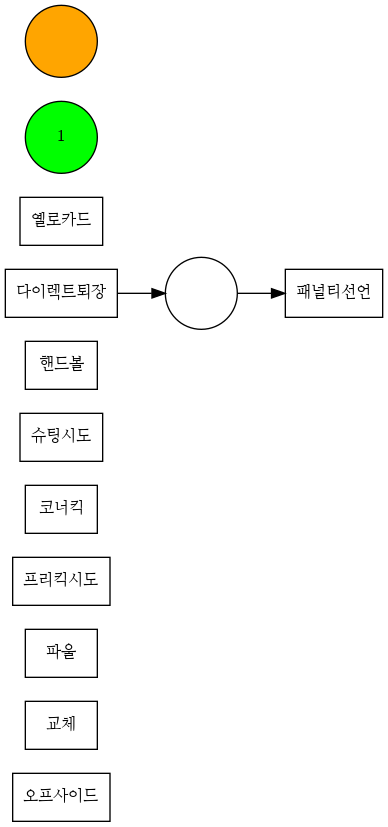

In [ ]:
net_Chelsea_filtered, im_Chelsea_filtered, fm_Chelsea_filtered = pm4py.discover_petri_net_alpha(Chelsea_filtered_event_log)
pm4py.view_petri_net(net_Chelsea_filtered, im_Chelsea_filtered, fm_Chelsea_filtered)

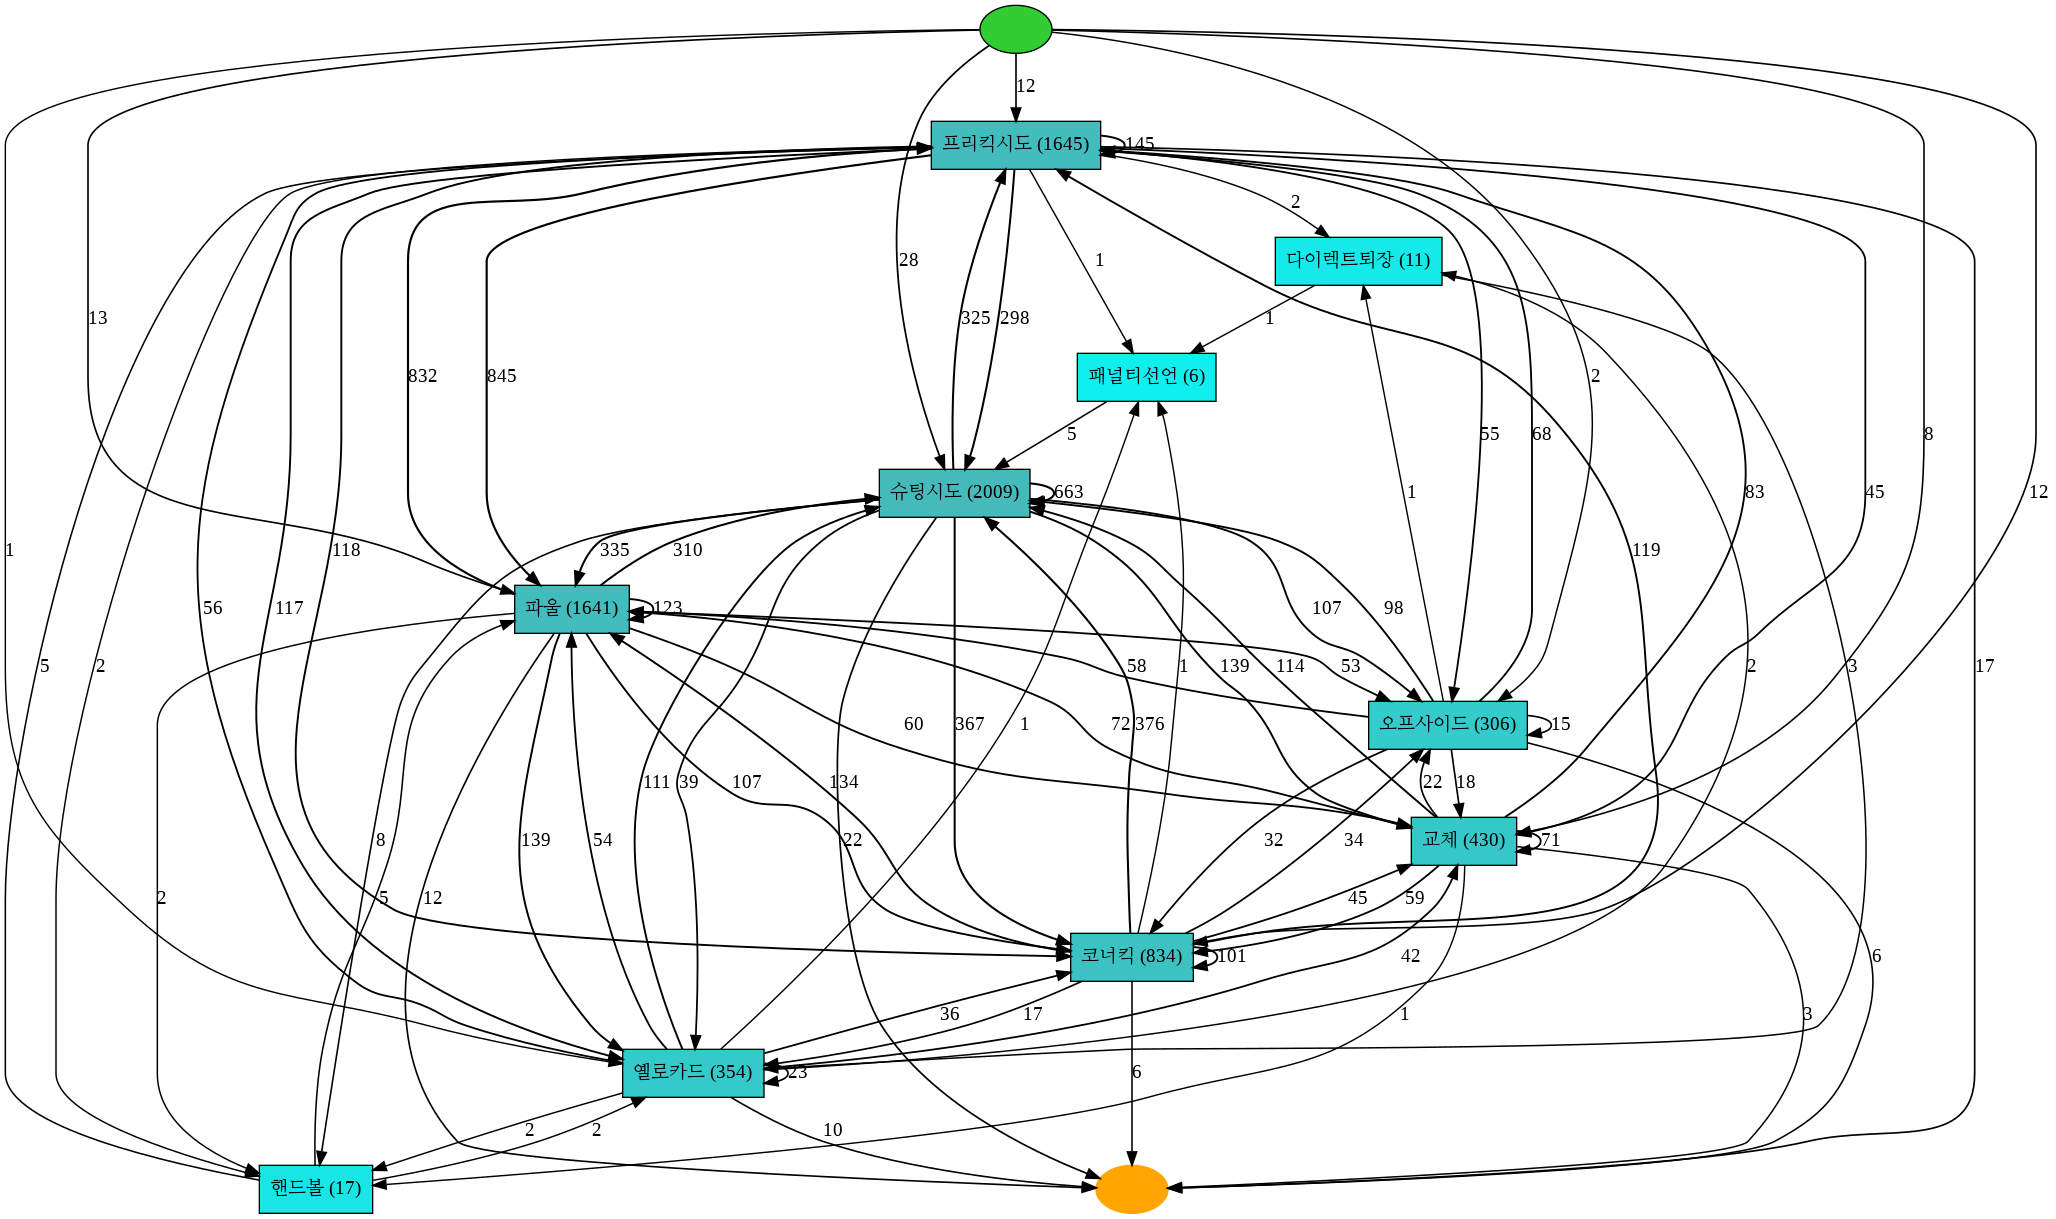

In [ ]:
heu_model_Chelsea_filtered = pm4py.discover_heuristics_net(Chelsea_filtered_event_log)
pm4py.view_heuristics_net(heu_model_Chelsea_filtered)

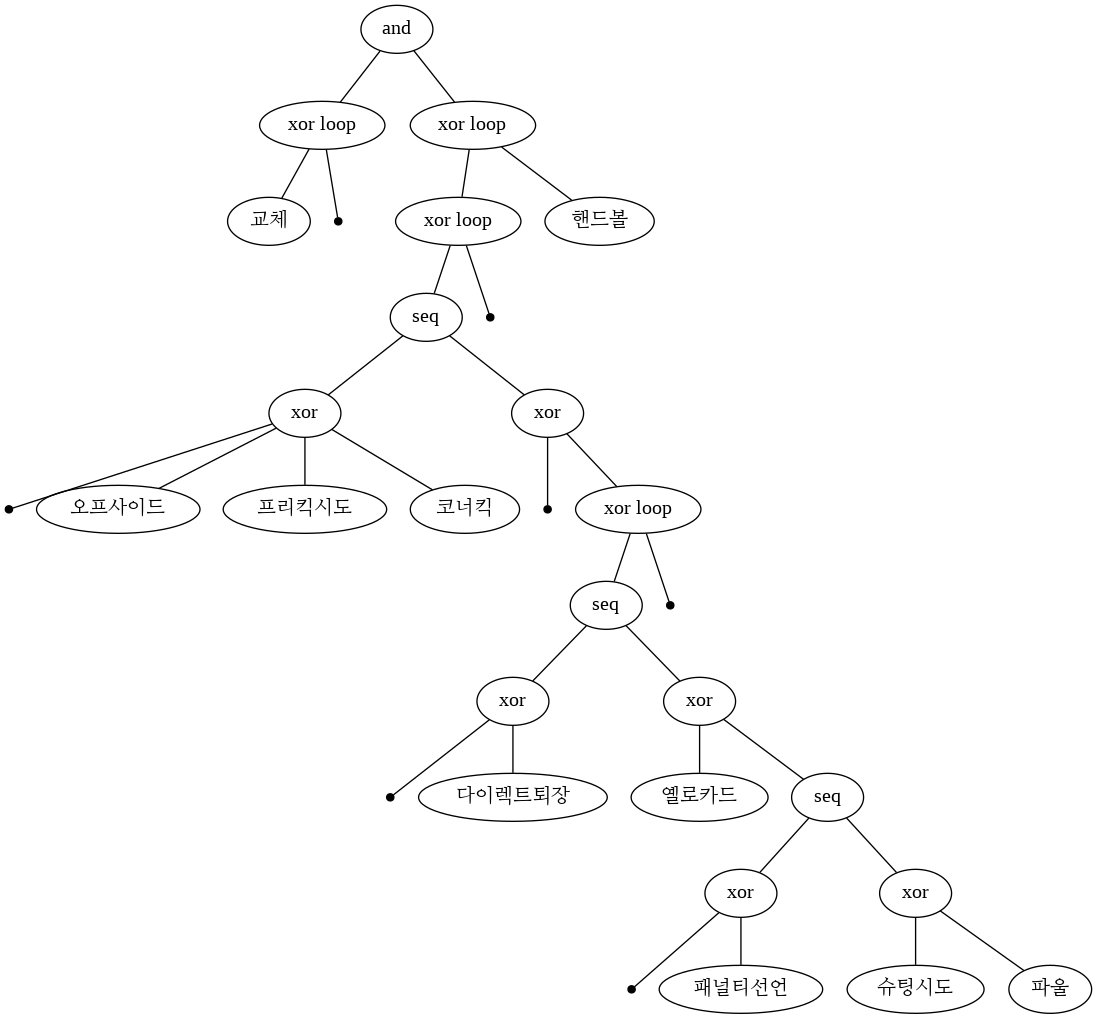

In [ ]:
tree_Chelsea_filtered = pm4py.discover_process_tree_inductive(Chelsea_filtered_event_log)
pm4py.view_process_tree(tree_Chelsea_filtered)

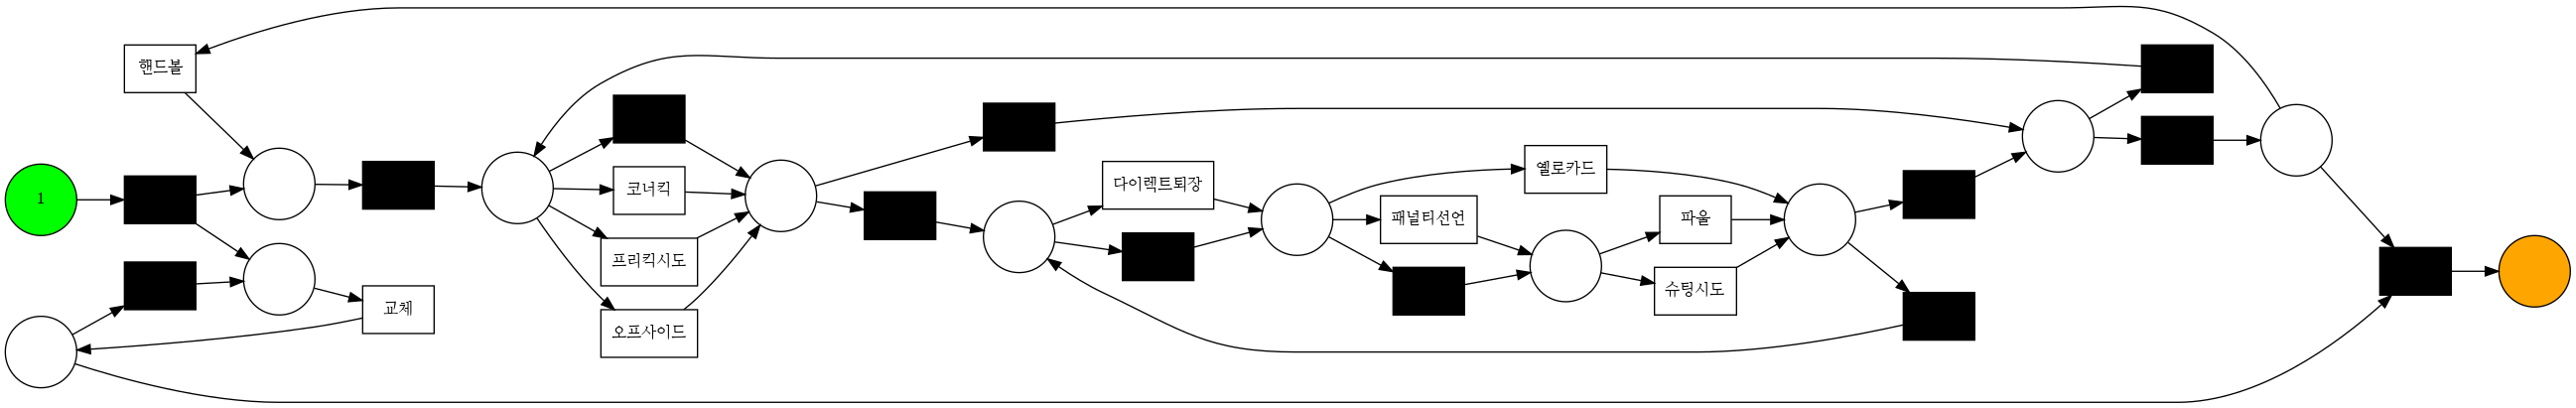

In [ ]:
net2_Chelsea_filtered, im2_Chelsea_filtered, fm2_Chelsea_filtered = pm4py.convert_to_petri_net(tree_Chelsea_filtered)
pm4py.view_petri_net(net2_Chelsea_filtered, im2_Chelsea_filtered, fm2_Chelsea_filtered)

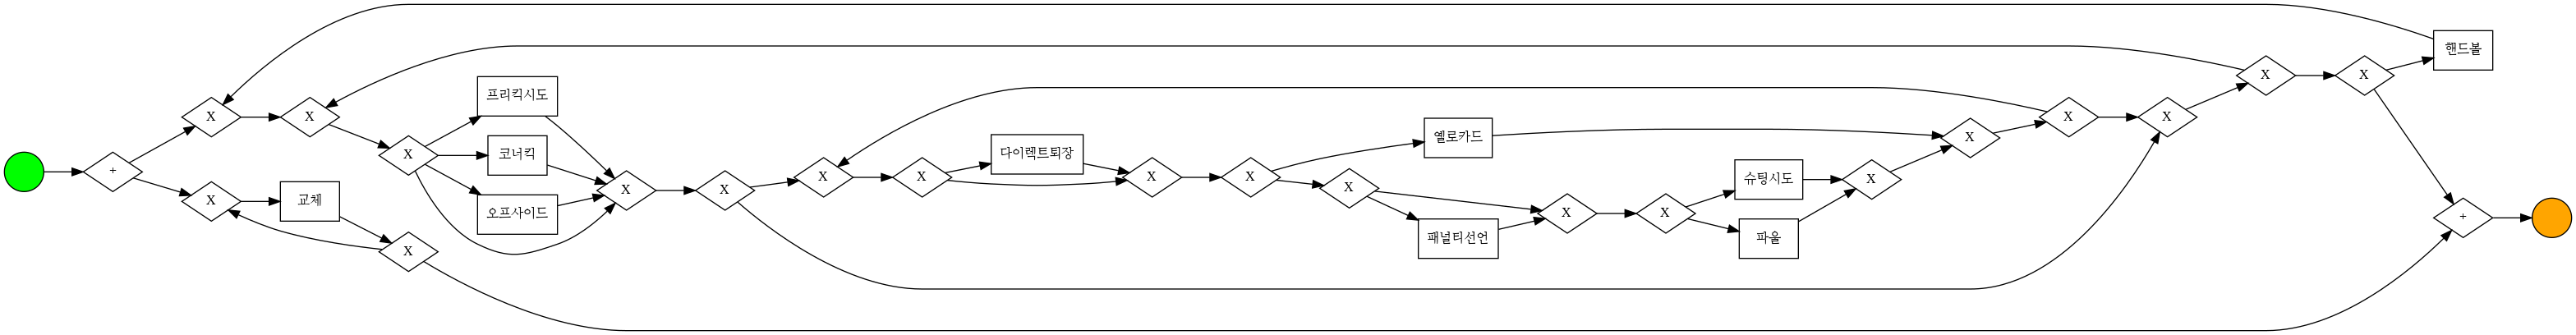

In [ ]:
bpmn_Chelsea_filtered = pm4py.discover_bpmn_inductive(Chelsea_filtered_event_log)
pm4py.view_bpmn(bpmn_Chelsea_filtered)

In [ ]:
token_replay(Chelsea_filtered_event_log, net_Chelsea_filtered, im_Chelsea_filtered, fm_Chelsea_filtered)

In [ ]:
net, im, fm = heuristics_miner.apply(Chelsea_filtered_event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
token_replay(Chelsea_filtered_event_log, net, im, fm)

In [ ]:
net, im, fm = inductive_miner.apply(Chelsea_filtered_event_log)
token_replay(Chelsea_filtered_event_log, net, im, fm)

## 15, 16시즌 첼시 승리 분석

In [56]:
Chelsea_win_filtered_event_log = pm4py.filter_event_attribute_values(Chelsea_filtered_event_log, 'result', {'승'}, level='event')
basic_data_analysis(Chelsea_win_filtered_event_log)
Chelsea_win_filtered_event_log

Number of events: 2605
Number of cases: 54
Start activities: {'첼시의프리킥시도': 14, '첼시의슈팅시도': 9, '첼시의파울': 8, '상대편의프리킥시도': 5, '상대편의슈팅시도': 4, '첼시의코너킥': 4, '첼시의교체': 3, '상대편의코너킥': 3, '상대편의파울': 3, '첼시의오프사이드': 1}
End activities: {'첼시의파울': 11, '첼시의프리킥시도': 9, '상대편의프리킥시도': 8, '첼시의슈팅시도': 7, '첼시의오프사이드': 4, '첼시의교체': 3, '첼시의코너킥': 3, '상대편의파울': 3, '상대편의교체': 2, '첼시의옐로카드': 2, '상대편의코너킥': 2}
Mean of case durations: 0.06


case:concept:name  ... @@index
585077  15 Aston Villa vs Chelsea  ...  585077
585080  15 Aston Villa vs Chelsea  ...  585080
585081  15 Aston Villa vs Chelsea  ...  585081
585082  15 Aston Villa vs Chelsea  ...  585082
585083  15 Aston Villa vs Chelsea  ...  585083
...                           ...  ...     ...
706895     16 West Ham vs Chelsea  ...  706895
706897     16 West Ham vs Chelsea  ...  706897
706899     16 West Ham vs Chelsea  ...  706899
706900     16 West Ham vs Chelsea  ...  706900
706903     16 West Ham vs Chelsea  ...  706903

[2605 rows x 27 columns]

In [57]:
for i in range(len(Chelsea_filtered_event_log)):
  if Chelsea_filtered_event_log["event_team"].iloc[i] == 'Chelsea' :
    Chelsea_filtered_event_log["concept:name"].iloc[i] = '첼시의'+ Chelsea_filtered_event_log["concept:name"].iloc[i]
  else :
     Chelsea_filtered_event_log["concept:name"].iloc[i] = '상대편의'+ Chelsea_filtered_event_log["concept:name"].iloc[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [58]:
Chelsea_win_filtered_event_log['case:concept:name'].unique()

array(['15 Aston Villa vs Chelsea', '15 Burnley vs Chelsea',
       '15 Chelsea vs Arsenal', '15 Chelsea vs Aston Villa',
       '15 Chelsea vs Crystal Palace', '15 Chelsea vs Everton',
       '15 Chelsea vs Hull', '15 Chelsea vs Leicester City',
       '15 Chelsea vs Manchester Utd', '15 Chelsea vs Newcastle',
       '15 Chelsea vs QPR', '15 Chelsea vs Stoke City',
       '15 Chelsea vs Sunderland', '15 Chelsea vs Swansea',
       '15 Chelsea vs Tottenham', '15 Chelsea vs West Brom',
       '15 Chelsea vs West Ham', '15 Crystal Palace vs Chelsea',
       '15 Everton vs Chelsea', '15 Hull vs Chelsea',
       '15 Leicester City vs Chelsea', '15 Liverpool vs Chelsea',
       '15 Newcastle vs Chelsea', '15 QPR vs Chelsea',
       '15 Stoke City vs Chelsea', '15 Swansea vs Chelsea',
       '15 Tottenham vs Chelsea', '15 West Brom vs Chelsea',
       '15 West Ham vs Chelsea', '16 Arsenal vs Chelsea',
       '16 Aston Villa vs Chelsea', '16 Bournemouth vs Chelsea',
       '16 Chelsea vs Arse

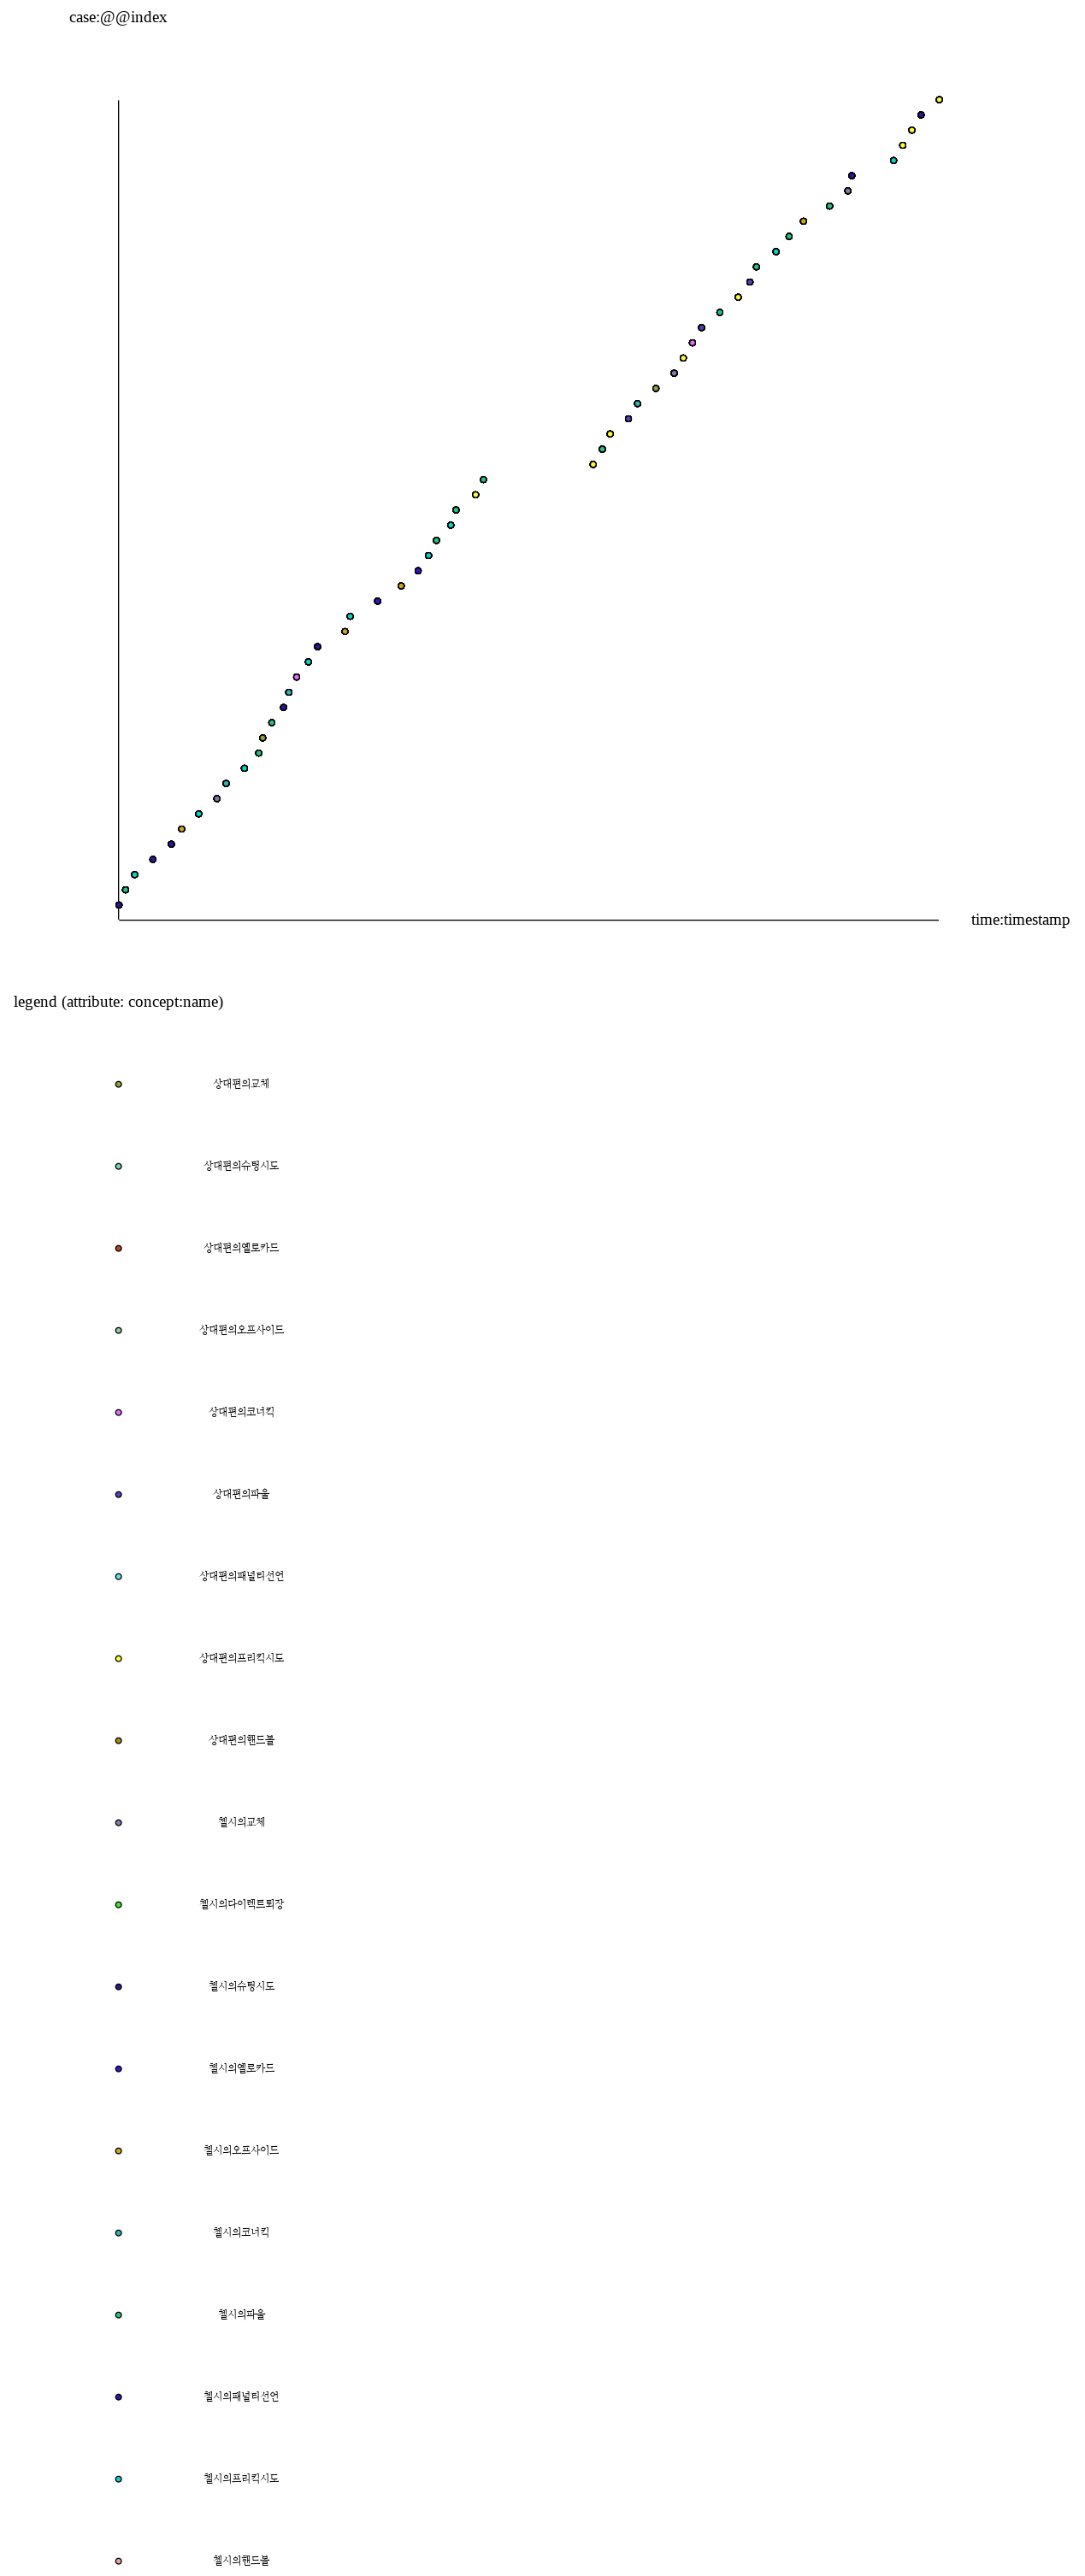

In [59]:
pm4py.view_dotted_chart(Chelsea_win_filtered_event_log)

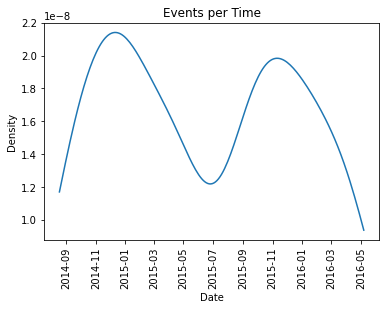

In [60]:
pm4py.view_events_per_time_graph(Chelsea_win_filtered_event_log)

/content/notebooks/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


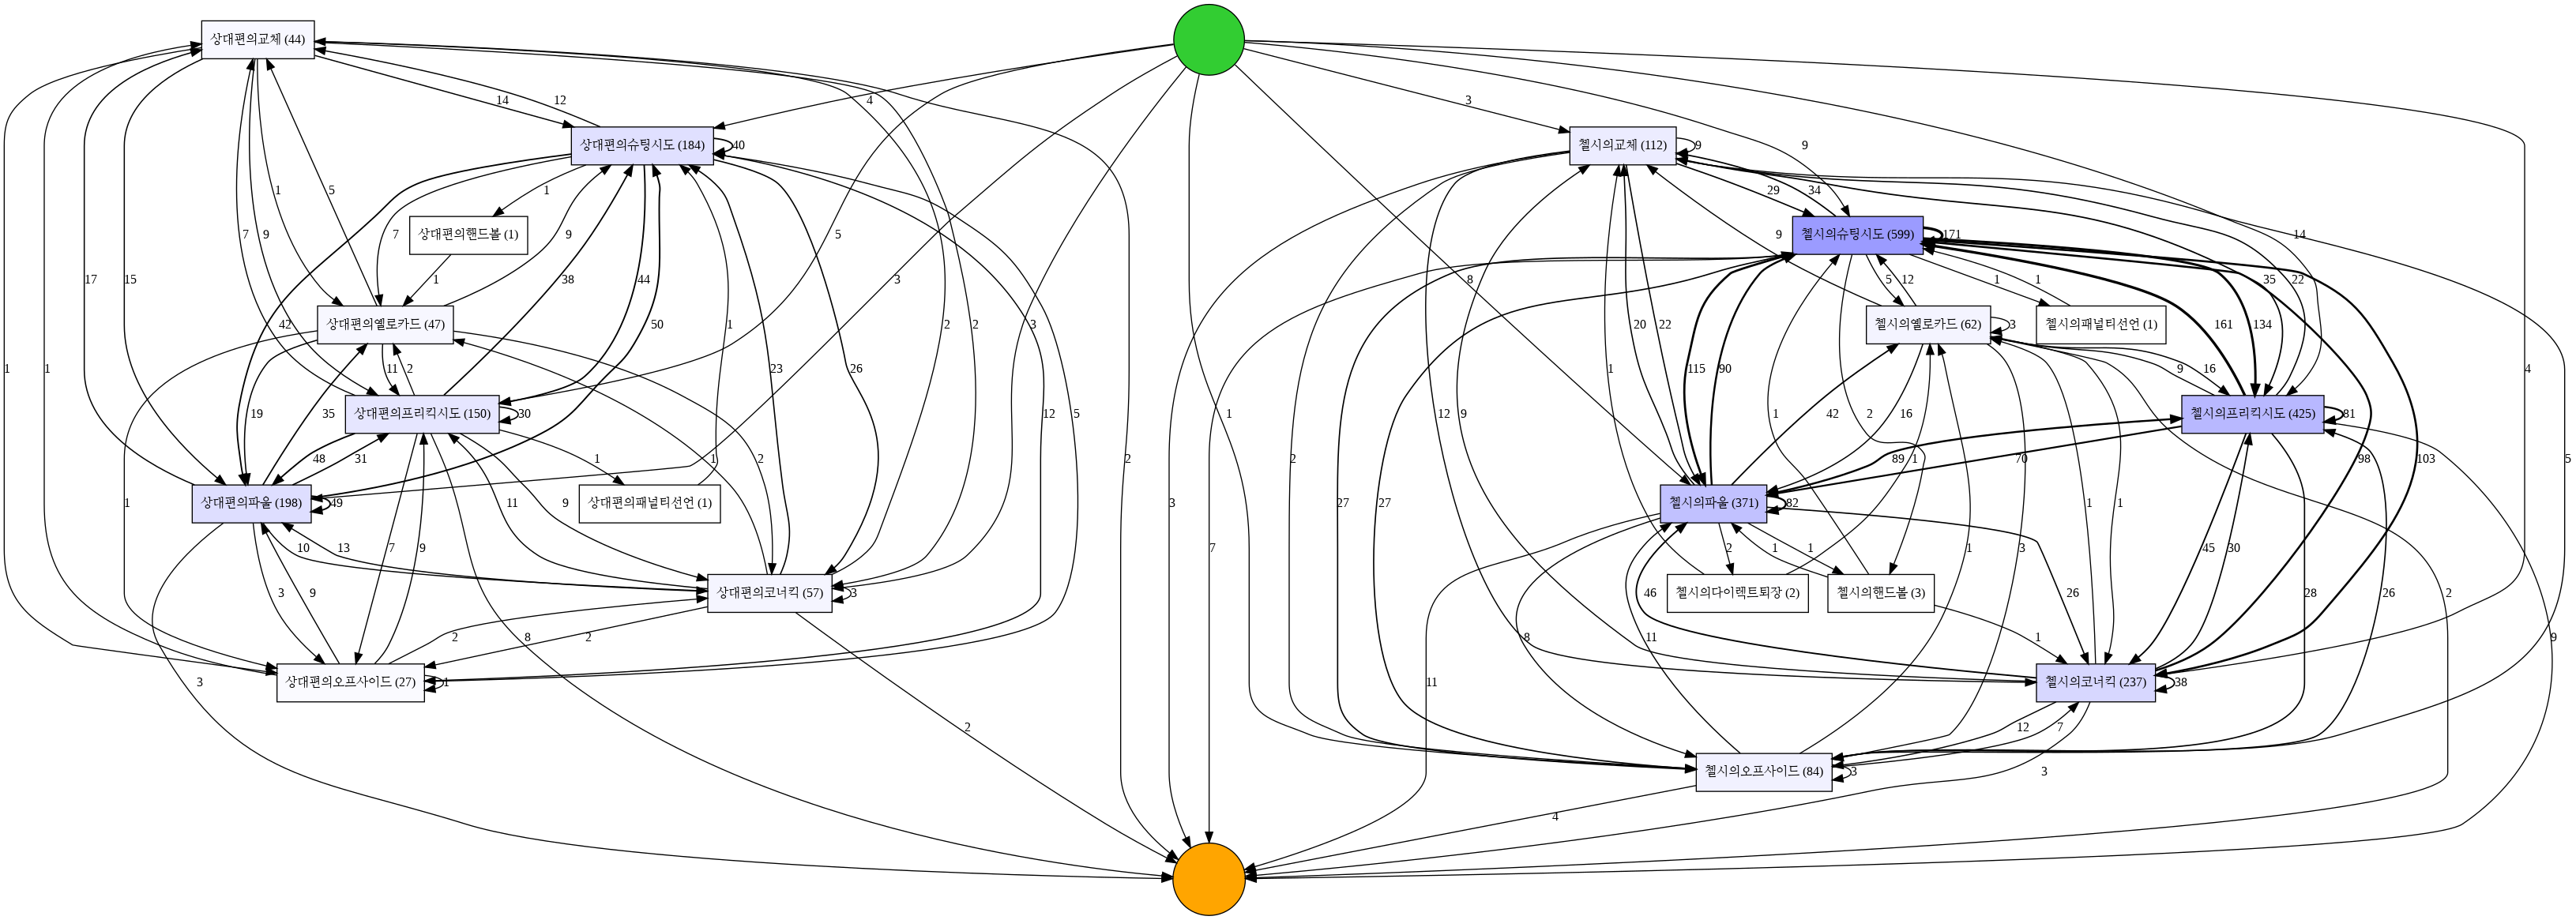

In [61]:
rel_Chelsea_win_filtered, start_Chelsea_win_filtered, final_Chelsea_win_filtered = pm4py.discover_dfg(Chelsea_win_filtered_event_log)
pm4py.view_dfg(rel_Chelsea_win_filtered, start_Chelsea_win_filtered, final_Chelsea_win_filtered)

/content/notebooks/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


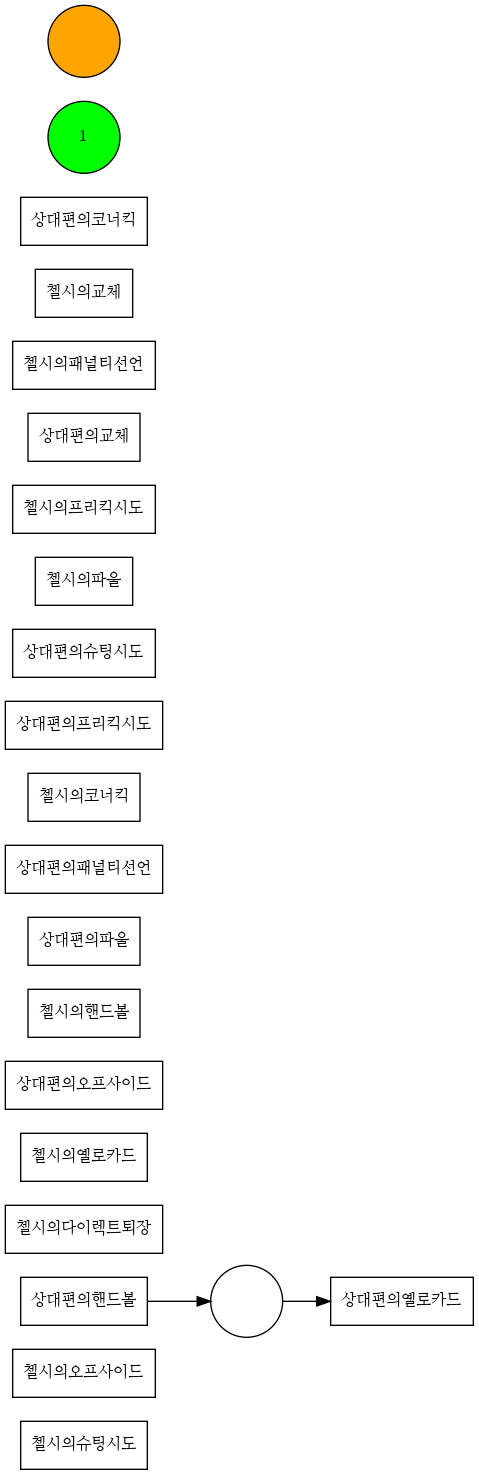

In [62]:
net_Chelsea_win_filtered, im_Chelsea_win_filtered, fm_Chelsea_win_filtered = pm4py.discover_petri_net_alpha(Chelsea_win_filtered_event_log)
pm4py.view_petri_net(net_Chelsea_win_filtered, im_Chelsea_win_filtered, fm_Chelsea_win_filtered)

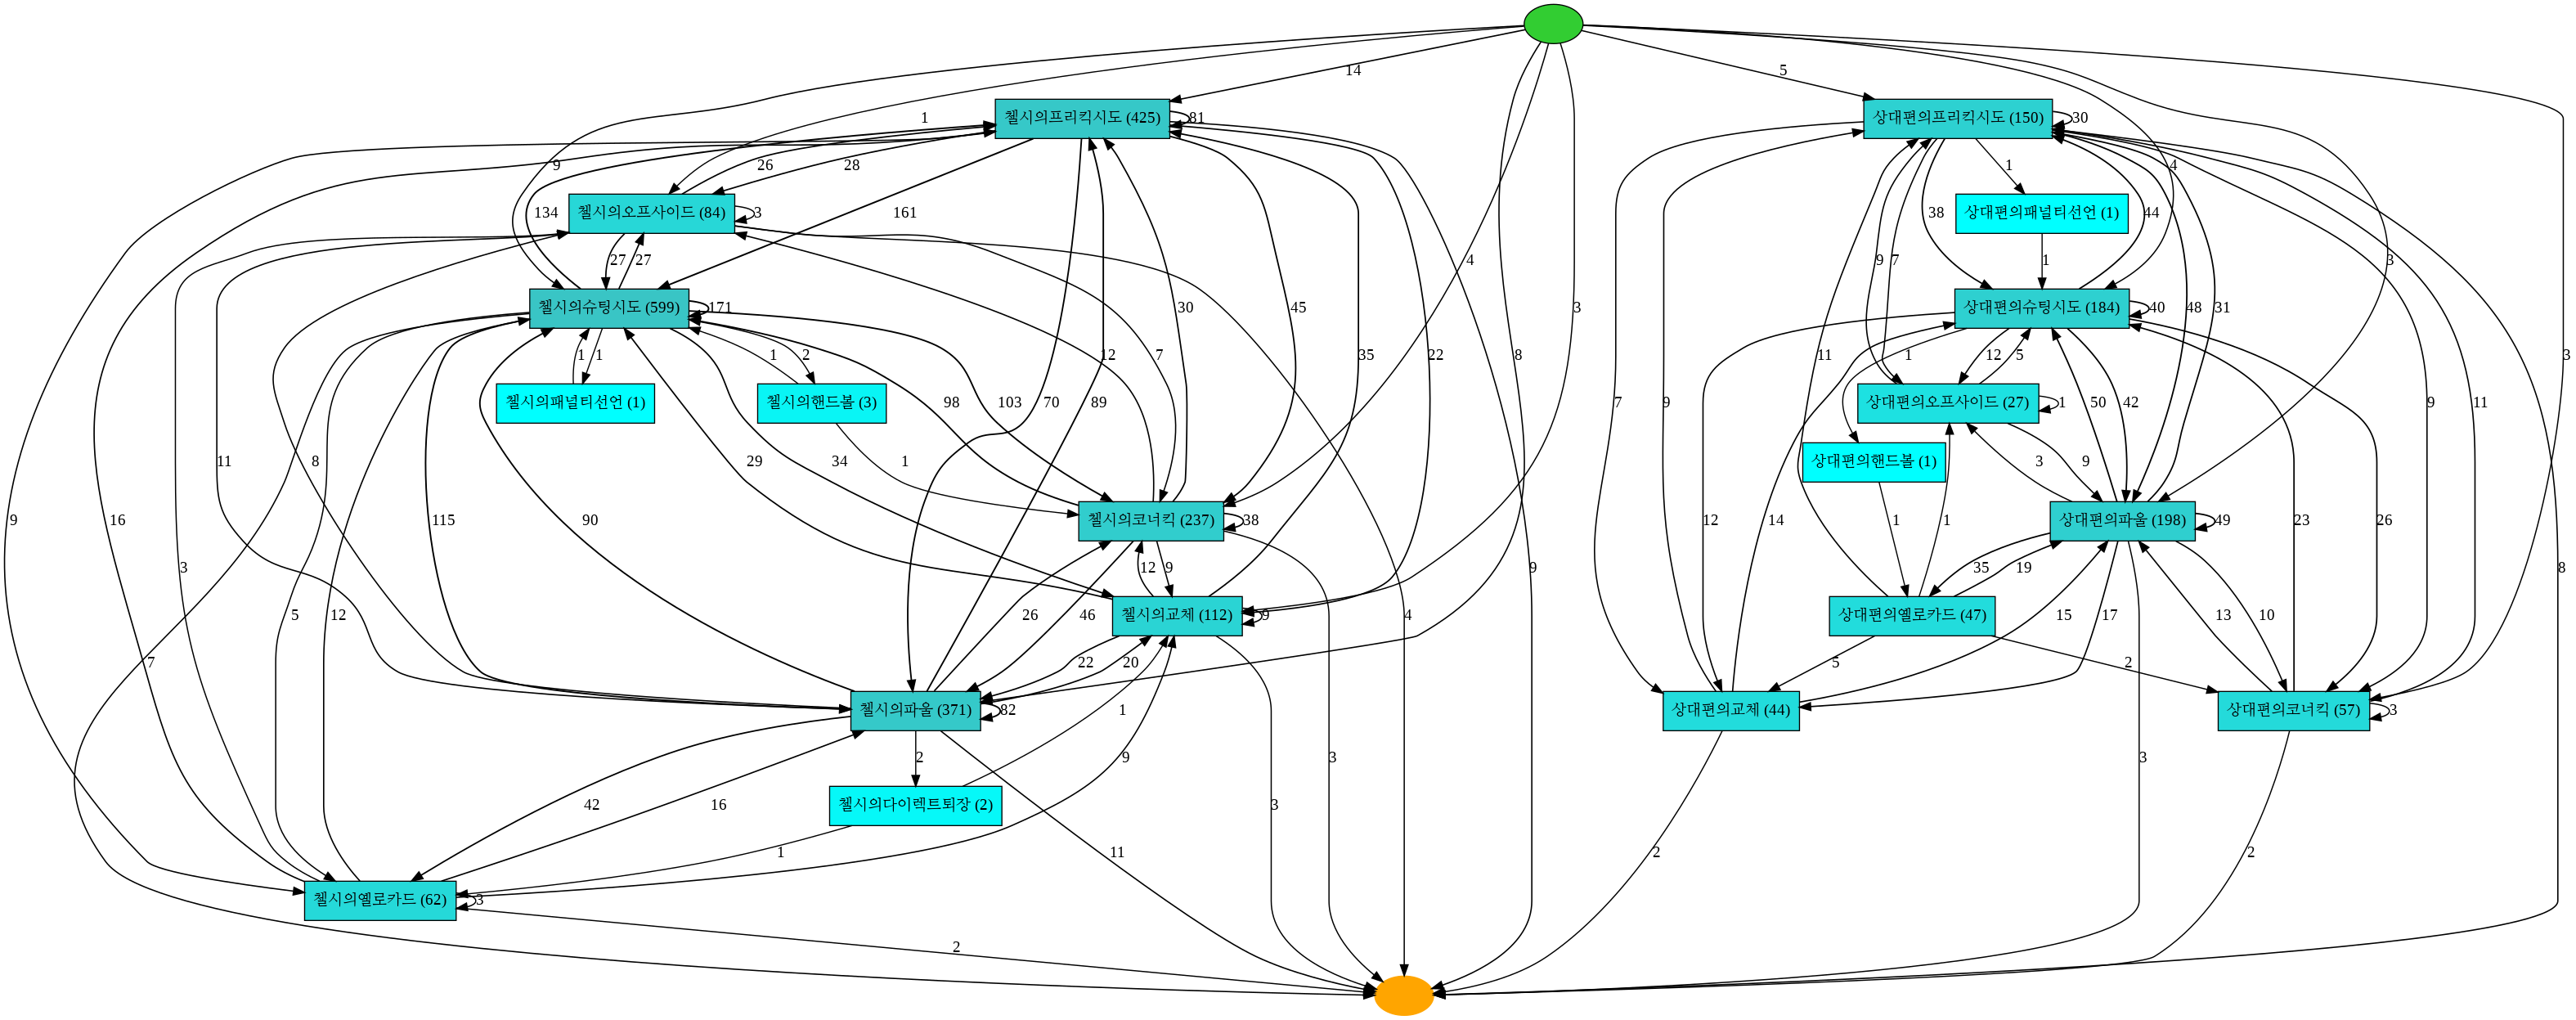

In [63]:
heu_model_Chelsea_win_filtered = pm4py.discover_heuristics_net(Chelsea_win_filtered_event_log)
pm4py.view_heuristics_net(heu_model_Chelsea_win_filtered)

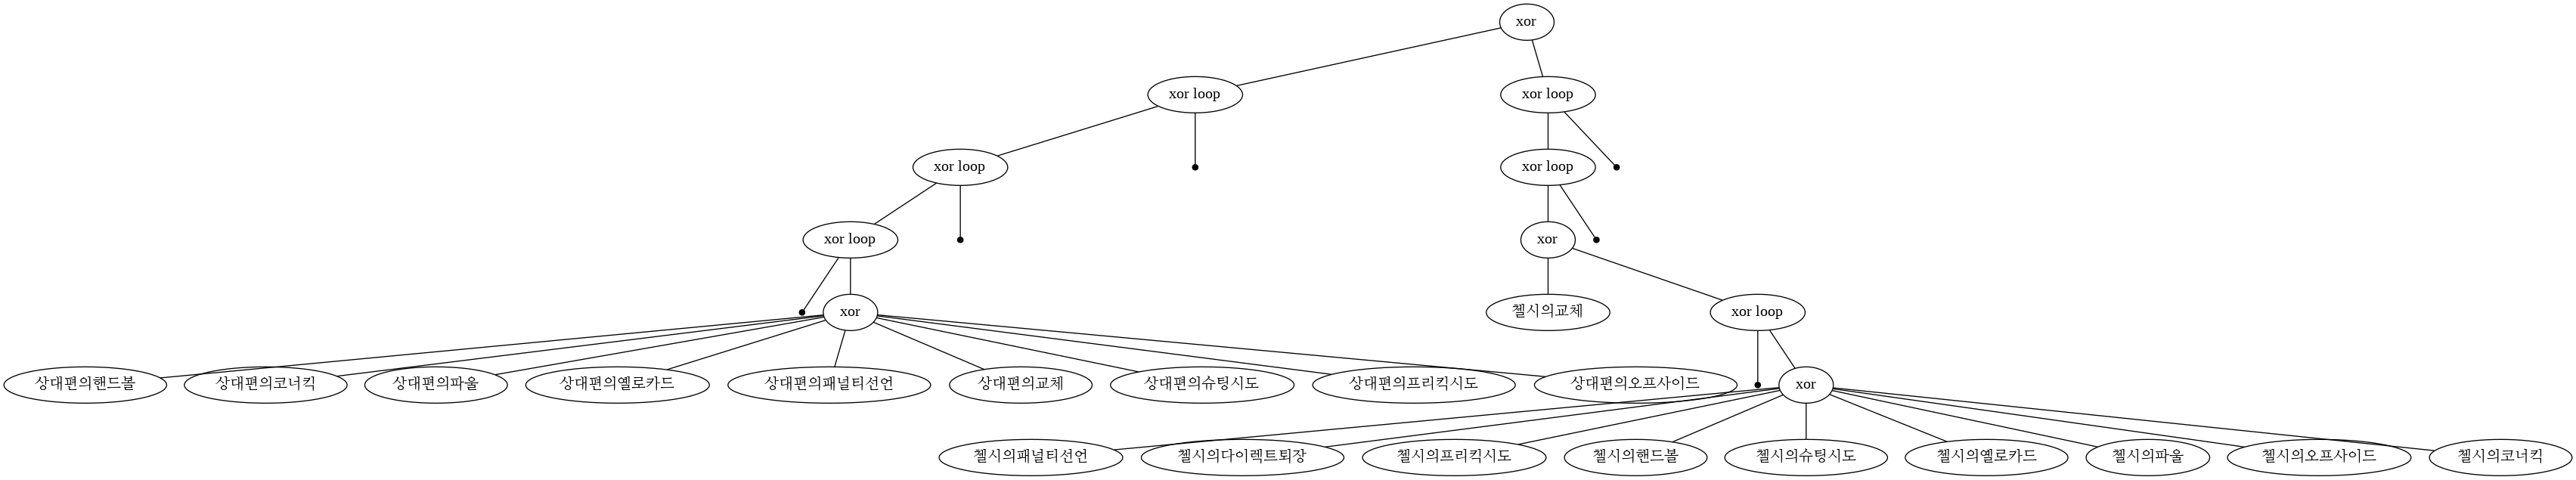

In [64]:
tree_Chelsea_win_filtered = pm4py.discover_process_tree_inductive(Chelsea_win_filtered_event_log)
pm4py.view_process_tree(tree_Chelsea_win_filtered)

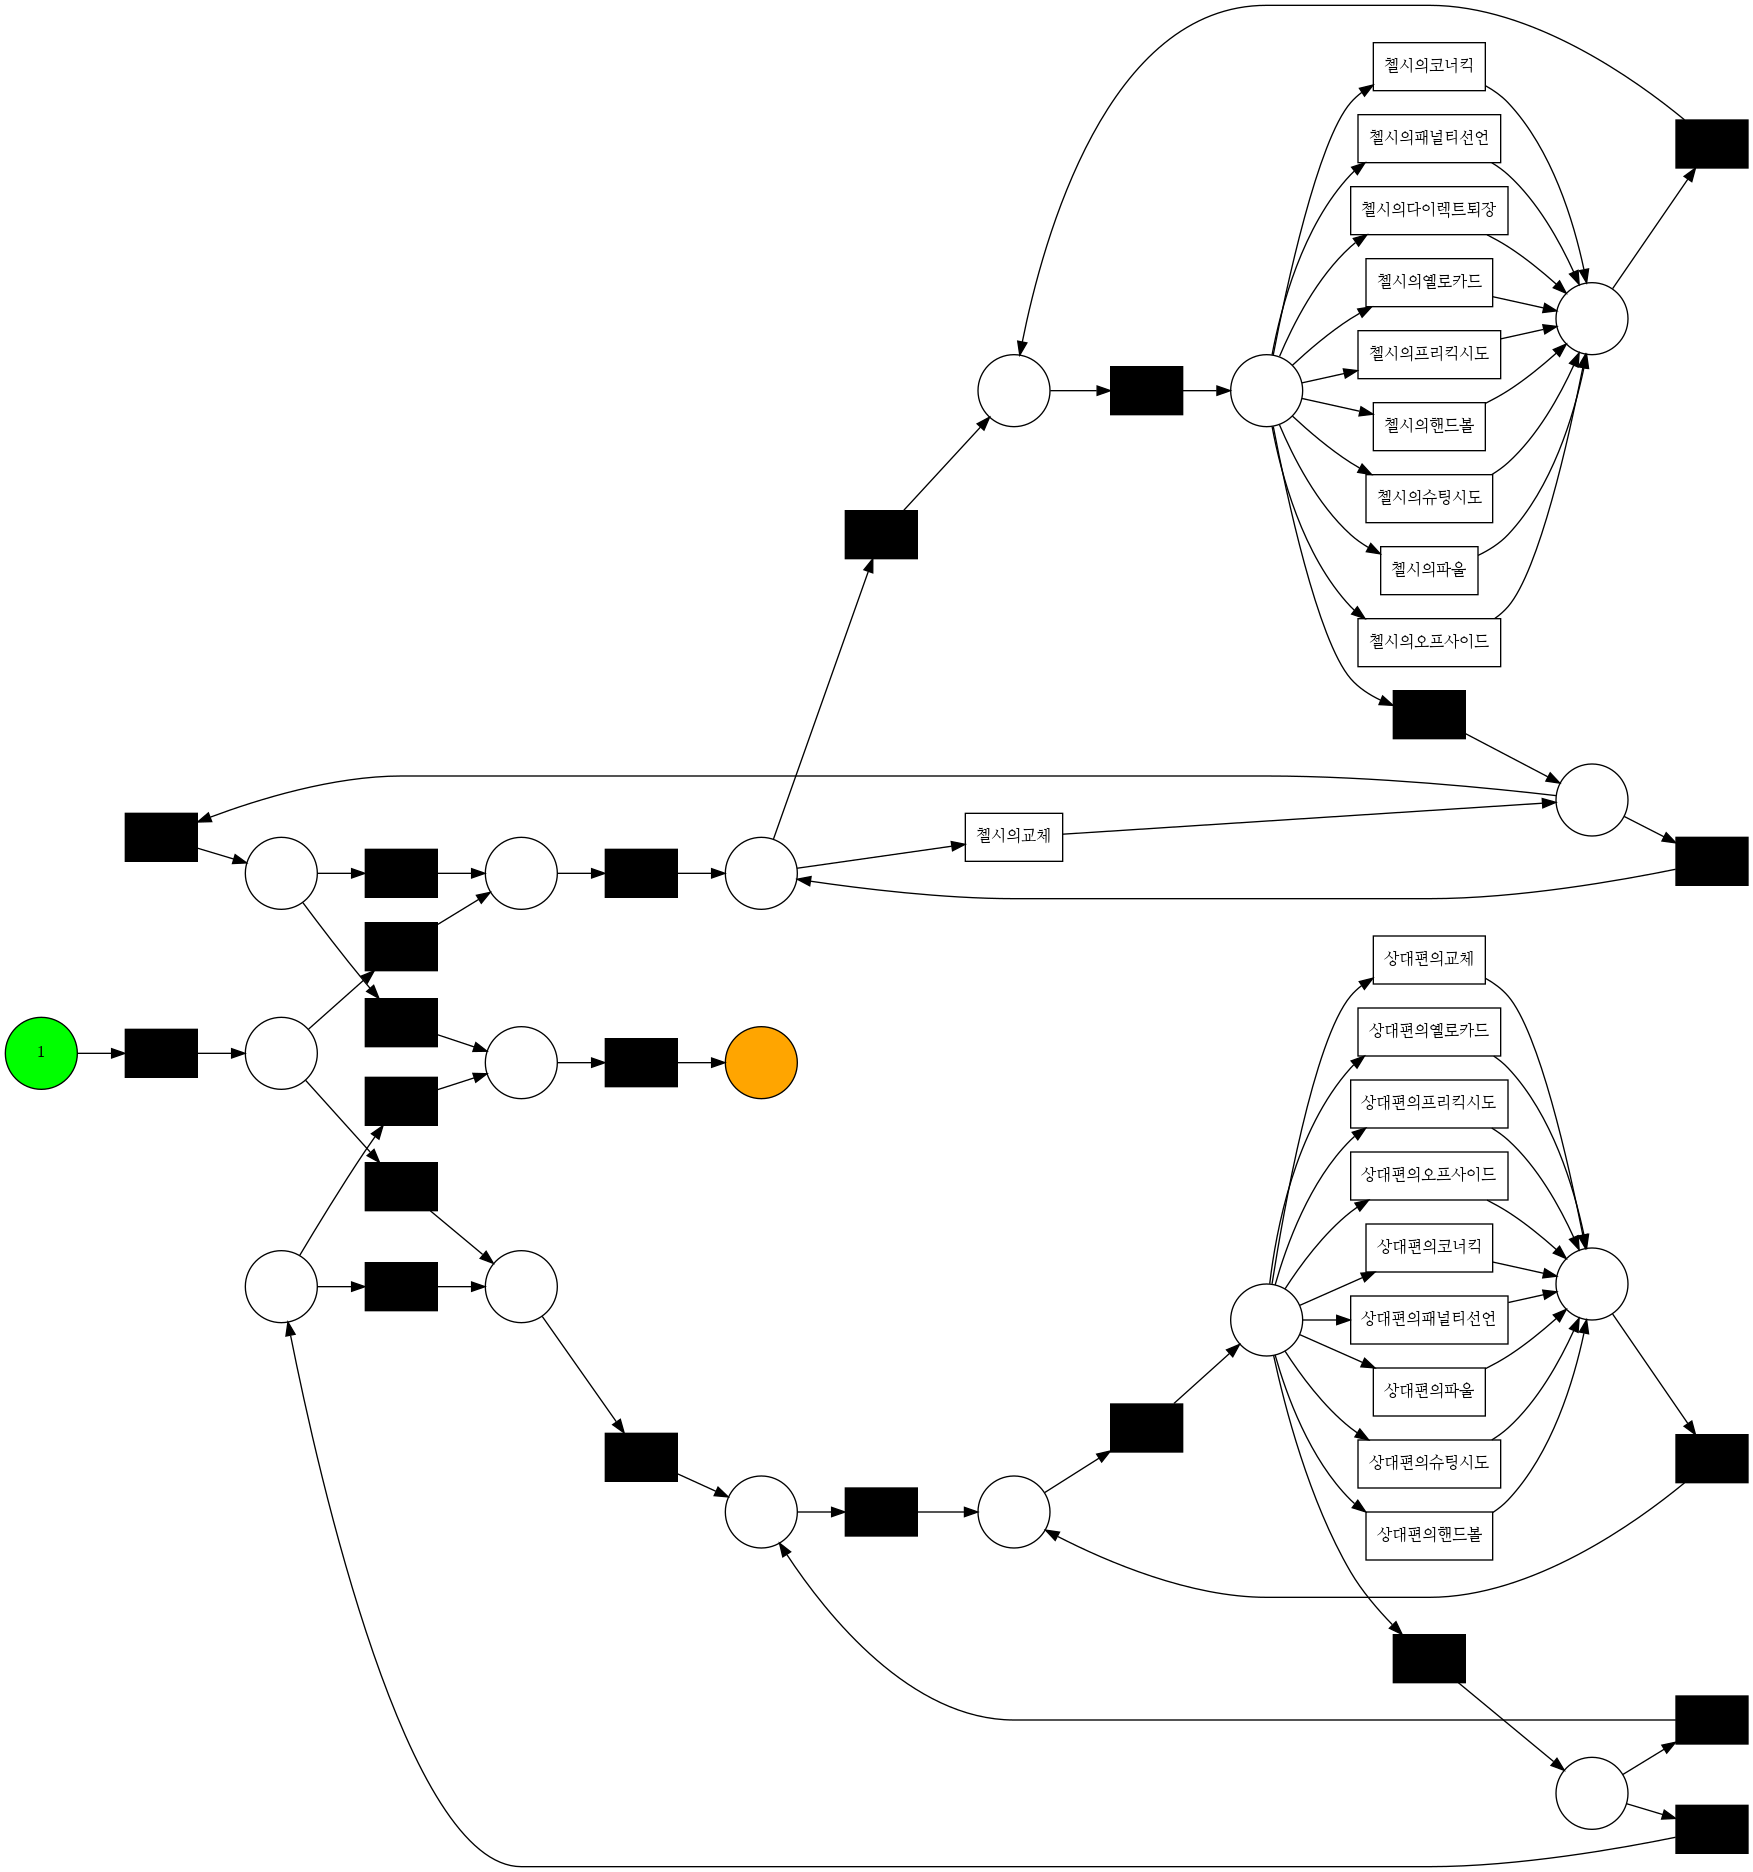

In [65]:
net2_Chelsea_win_filtered, im2_Chelsea_win_filtered, fm2_Chelsea_win_filtered = pm4py.convert_to_petri_net(tree_Chelsea_win_filtered)
pm4py.view_petri_net(net2_Chelsea_win_filtered, im2_Chelsea_win_filtered, fm2_Chelsea_win_filtered)

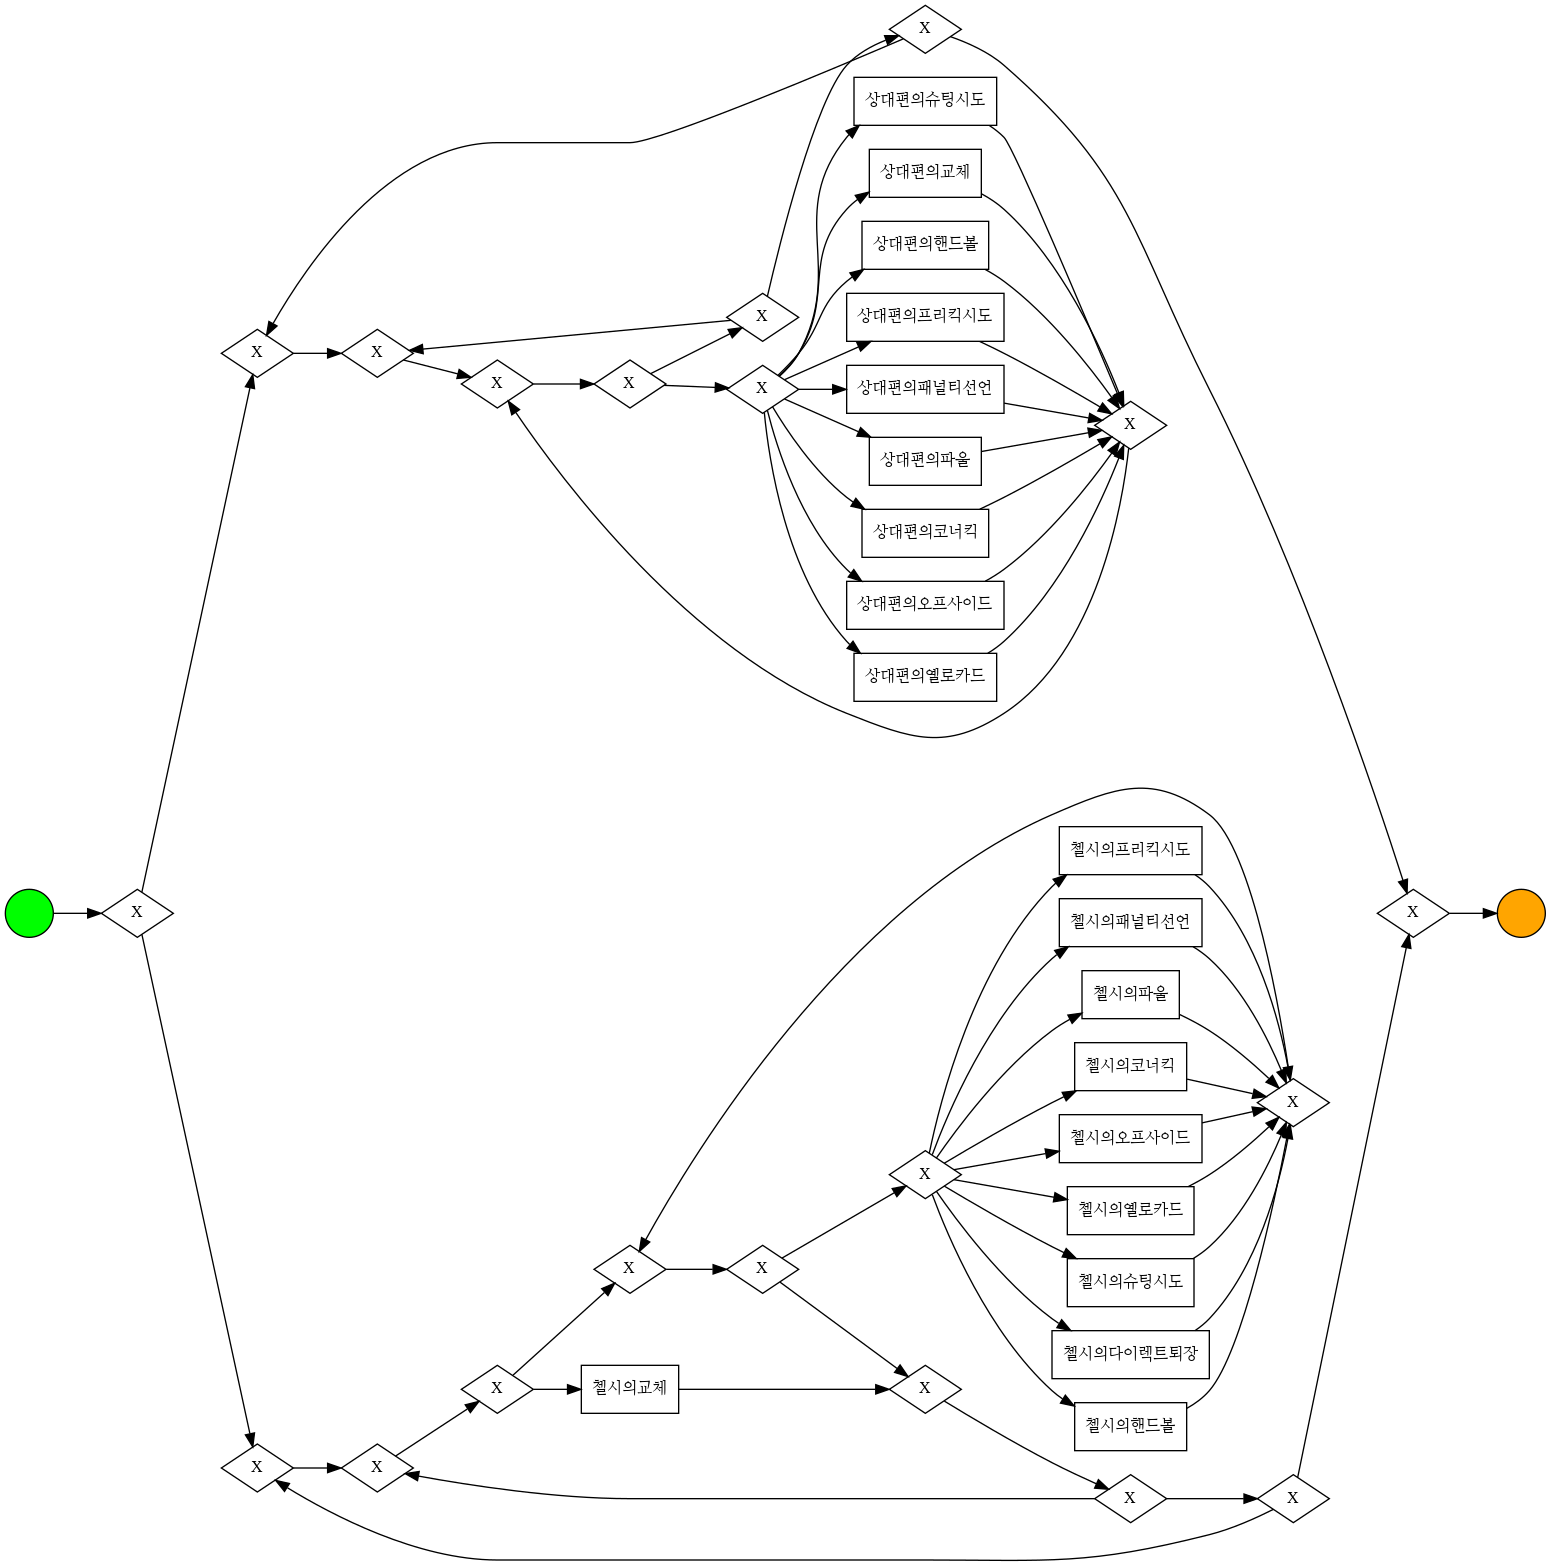

In [66]:
bpmn_Chelsea_win_filtered = pm4py.discover_bpmn_inductive(Chelsea_win_filtered_event_log)
pm4py.view_bpmn(bpmn_Chelsea_win_filtered)

In [67]:
token_replay(Chelsea_win_filtered_event_log, net_Chelsea_win_filtered, im_Chelsea_win_filtered, fm_Chelsea_win_filtered)

replaying log with TBR, completed variants ::   0%|          | 0/54 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/54 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2470 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/54 [00:00<?, ?it/s]

fitness : {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.005787037037037037, 'log_fitness': 0.014041404140414049, 'percentage_of_fitting_traces': 0.0}
precision : 0.07294510160752199
generalization : 0.7016179377719615
simplicity : 1.0


In [68]:
net, im, fm = heuristics_miner.apply(Chelsea_win_filtered_event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
token_replay(Chelsea_win_filtered_event_log, net, im, fm)

/content/notebooks/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


replaying log with TBR, completed variants ::   0%|          | 0/54 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/54 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2470 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/54 [00:00<?, ?it/s]

fitness : {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.5111203458327184, 'log_fitness': 0.7177286233080225, 'percentage_of_fitting_traces': 0.0}
precision : 0.09388733519776271
generalization : 0.6840413471343679
simplicity : 0.5632183908045977


In [69]:
net, im, fm = inductive_miner.apply(Chelsea_win_filtered_event_log)
token_replay(Chelsea_win_filtered_event_log, net, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/54 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/54 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2470 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/54 [00:00<?, ?it/s]

fitness : {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
precision : 0.12800866805974764
generalization : 0.7196824719613959
simplicity : 0.5619047619047619


## 시간 전처리

In [157]:
Chelsea_time_duplicate_df=Chelsea_win_filtered_event_log[Chelsea_win_filtered_event_log.duplicated(subset=['time:timestamp'])]
Chelsea_time_duplicate_df

case:concept:name  ...           start_timestamp
585083  15 Aston Villa vs Chelsea  ... 2015-02-07 00:10:00+00:00
585093  15 Aston Villa vs Chelsea  ... 2015-02-07 00:22:00+00:00
585094  15 Aston Villa vs Chelsea  ... 2015-02-07 00:22:00+00:00
585119  15 Aston Villa vs Chelsea  ... 2015-02-07 00:51:00+00:00
585135  15 Aston Villa vs Chelsea  ... 2015-02-07 01:12:00+00:00
...                           ...  ...                       ...
671590    16 West Brom vs Chelsea  ... 2015-08-23 01:17:00+00:00
706823     16 West Ham vs Chelsea  ... 2015-10-24 00:16:00+00:00
706878     16 West Ham vs Chelsea  ... 2015-10-24 01:08:00+00:00
706882     16 West Ham vs Chelsea  ... 2015-10-24 01:14:00+00:00
706886     16 West Ham vs Chelsea  ... 2015-10-24 01:18:00+00:00

[544 rows x 28 columns]

In [158]:
duplicate_count=pd.DataFrame(Chelsea_time_duplicate_df['time:timestamp'].groupby(Chelsea_time_duplicate_df['time:timestamp']).count())
duplicate_count.columns = ['duplicate_count_num']
duplicate_count

duplicate_count_num
time:timestamp                                
2014-08-18 00:04:00+00:00                    1
2014-08-23 00:02:00+00:00                    1
2014-08-23 00:07:00+00:00                    2
2014-08-23 00:19:00+00:00                    1
2014-08-23 00:36:00+00:00                    2
...                                        ...
2016-05-07 01:06:00+00:00                    1
2016-05-07 01:12:00+00:00                    1
2016-05-07 01:28:00+00:00                    2
2016-05-07 01:29:00+00:00                    1
2016-05-07 01:30:00+00:00                    3

[468 rows x 1 columns]

In [159]:
Chelsea_time_duplicate_df=pd.merge(Chelsea_time_duplicate_df,duplicate_count,on='time:timestamp', how='left')
Chelsea_time_duplicate_df

case:concept:name  ... duplicate_count_num
0    15 Aston Villa vs Chelsea  ...                   1
1    15 Aston Villa vs Chelsea  ...                   2
2    15 Aston Villa vs Chelsea  ...                   2
3    15 Aston Villa vs Chelsea  ...                   1
4    15 Aston Villa vs Chelsea  ...                   1
..                         ...  ...                 ...
539    16 West Brom vs Chelsea  ...                   1
540     16 West Ham vs Chelsea  ...                   1
541     16 West Ham vs Chelsea  ...                   1
542     16 West Ham vs Chelsea  ...                   1
543     16 West Ham vs Chelsea  ...                   1

[544 rows x 29 columns]

In [160]:
Chelsea_time_duplicate_df.iloc[0,25]

Timestamp('2015-02-07 00:10:00+0000', tz='UTC')

In [161]:
for j in range(len(Chelsea_time_duplicate_df)) :
    if Chelsea_time_duplicate_df.iloc[j,28] == 1 :
      Chelsea_time_duplicate_df.iloc[j,25]=Chelsea_time_duplicate_df.iloc[j,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j,28]=Chelsea_time_duplicate_df.iloc[j,28]-1
    elif Chelsea_time_duplicate_df.iloc[j,28] == 2 :
      Chelsea_time_duplicate_df.iloc[j,25]=Chelsea_time_duplicate_df.iloc[j,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j,28]=Chelsea_time_duplicate_df.iloc[j,28]-2
      Chelsea_time_duplicate_df.iloc[j+1,28]=Chelsea_time_duplicate_df.iloc[j+1,28]-1
      Chelsea_time_duplicate_df.iloc[j+1,25]=Chelsea_time_duplicate_df.iloc[j+1,25]+datetime.timedelta(seconds=10)
    elif Chelsea_time_duplicate_df.iloc[j,28] == 3 :
      Chelsea_time_duplicate_df.iloc[j,25]=Chelsea_time_duplicate_df.iloc[j,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j,28]=Chelsea_time_duplicate_df.iloc[j,28]-3
      Chelsea_time_duplicate_df.iloc[j+1,28]=Chelsea_time_duplicate_df.iloc[j+1,28]-1
      Chelsea_time_duplicate_df.iloc[j+2,28]=Chelsea_time_duplicate_df.iloc[j+2,28]-1
      Chelsea_time_duplicate_df.iloc[j+1,25]=Chelsea_time_duplicate_df.iloc[j+1,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j+2,25]=Chelsea_time_duplicate_df.iloc[j+2,25]+datetime.timedelta(seconds=10)
    elif Chelsea_time_duplicate_df.iloc[j,28] == 4 :
      Chelsea_time_duplicate_df.iloc[j,25]=Chelsea_time_duplicate_df.iloc[j,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j,28]=Chelsea_time_duplicate_df.iloc[j,28]-4
      Chelsea_time_duplicate_df.iloc[j+1,28]=Chelsea_time_duplicate_df.iloc[j+1,28]-1
      Chelsea_time_duplicate_df.iloc[j+2,28]=Chelsea_time_duplicate_df.iloc[j+2,28]-1
      Chelsea_time_duplicate_df.iloc[j+3,28]=Chelsea_time_duplicate_df.iloc[j+3,28]-1
      Chelsea_time_duplicate_df.iloc[j+1,25]=Chelsea_time_duplicate_df.iloc[j+1,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j+2,25]=Chelsea_time_duplicate_df.iloc[j+2,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j+3,25]=Chelsea_time_duplicate_df.iloc[j+3,25]+datetime.timedelta(seconds=10)
    elif Chelsea_time_duplicate_df.iloc[j,28] == 5 :
      Chelsea_time_duplicate_df.iloc[j,25]=Chelsea_time_duplicate_df.iloc[j,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j,28]=Chelsea_time_duplicate_df.iloc[j,28]-5
      Chelsea_time_duplicate_df.iloc[j+1,28]=Chelsea_time_duplicate_df.iloc[j+1,28]-1
      Chelsea_time_duplicate_df.iloc[j+2,28]=Chelsea_time_duplicate_df.iloc[j+2,28]-1
      Chelsea_time_duplicate_df.iloc[j+3,28]=Chelsea_time_duplicate_df.iloc[j+3,28]-1
      Chelsea_time_duplicate_df.iloc[j+4,28]=Chelsea_time_duplicate_df.iloc[j+4,28]-1
      Chelsea_time_duplicate_df.iloc[j+1,25]=Chelsea_time_duplicate_df.iloc[j+1,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j+2,25]=Chelsea_time_duplicate_df.iloc[j+2,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j+3,25]=Chelsea_time_duplicate_df.iloc[j+3,25]+datetime.timedelta(seconds=10)
      Chelsea_time_duplicate_df.iloc[j+4,25]=Chelsea_time_duplicate_df.iloc[j+4,25]+datetime.timedelta(seconds=10)
    else :
      print(j)

Chelsea_time_duplicate_df

case:concept:name  ... duplicate_count_num
0    15 Aston Villa vs Chelsea  ...                   0
1    15 Aston Villa vs Chelsea  ...                   0
2    15 Aston Villa vs Chelsea  ...                   0
3    15 Aston Villa vs Chelsea  ...                   0
4    15 Aston Villa vs Chelsea  ...                   0
..                         ...  ...                 ...
539    16 West Brom vs Chelsea  ...                   0
540     16 West Ham vs Chelsea  ...                   0
541     16 West Ham vs Chelsea  ...                   0
542     16 West Ham vs Chelsea  ...                   0
543     16 West Ham vs Chelsea  ...                   0

[544 rows x 29 columns]

## 첼시 우승 골 3분 전부터 goal 시점까지의 이벤트 로그

In [75]:
is_goal_time=Chelsea_win_filtered_event_log[Chelsea_win_filtered_event_log['is_goal']==1].loc[:,'time:timestamp']
is_goal_time

585081   2015-02-07 00:07:00+00:00
585130   2015-02-07 01:05:00+00:00
484085   2014-08-18 00:16:00+00:00
484086   2014-08-18 00:21:00+00:00
484094   2014-08-18 00:34:00+00:00
                    ...           
671534   2015-08-23 00:20:00+00:00
671543   2015-08-23 00:29:00+00:00
671552   2015-08-23 00:42:00+00:00
706824   2015-10-24 00:17:00+00:00
706886   2015-10-24 01:18:00+00:00
Name: time:timestamp, Length: 134, dtype: datetime64[ns, UTC]

In [81]:
is_goal_three_minutes_before_time=is_goal_time-datetime.timedelta(minutes=3)
is_goal_three_minutes_before_time

585081   2015-02-07 00:04:00+00:00
585130   2015-02-07 01:02:00+00:00
484085   2014-08-18 00:13:00+00:00
484086   2014-08-18 00:18:00+00:00
484094   2014-08-18 00:31:00+00:00
                    ...           
671534   2015-08-23 00:17:00+00:00
671543   2015-08-23 00:26:00+00:00
671552   2015-08-23 00:39:00+00:00
706824   2015-10-24 00:14:00+00:00
706886   2015-10-24 01:15:00+00:00
Name: time:timestamp, Length: 134, dtype: datetime64[ns, UTC]

In [89]:
goal_event_log=pd.DataFrame()
for i in range(len(is_goal_time)) :
  filtered_event_log = pm4py.filter_time_range(Chelsea_win_filtered_event_log, is_goal_three_minutes_before_time.iloc[i], is_goal_time.iloc[i], mode = 'events')
  goal_event_log=pd.concat([goal_event_log, filtered_event_log])
goal_event_log.head(10)

case:concept:name  ...           start_timestamp
585080  15 Aston Villa vs Chelsea  ... 2015-02-07 00:06:00+00:00
585081  15 Aston Villa vs Chelsea  ... 2015-02-07 00:07:00+00:00
585126  15 Aston Villa vs Chelsea  ... 2015-02-07 01:02:00+00:00
585128  15 Aston Villa vs Chelsea  ... 2015-02-07 01:03:00+00:00
585129  15 Aston Villa vs Chelsea  ... 2015-02-07 01:04:00+00:00
585130  15 Aston Villa vs Chelsea  ... 2015-02-07 01:05:00+00:00
484085      15 Burnley vs Chelsea  ... 2014-08-18 00:16:00+00:00
484086      15 Burnley vs Chelsea  ... 2014-08-18 00:21:00+00:00
484093      15 Burnley vs Chelsea  ... 2014-08-18 00:33:00+00:00
484094      15 Burnley vs Chelsea  ... 2014-08-18 00:34:00+00:00

[10 rows x 28 columns]

In [92]:
goal_event_log_pm4py = pm4py.format_dataframe(goal_event_log, case_id='case:concept:name', activity_key='concept:name',
                                         timestamp_key='time:timestamp', timest_format='%Y-%m-%d %H:%M:%S%z')
goal_event_log_pm4py

case:concept:name  ...           start_timestamp
585080  15 Aston Villa vs Chelsea  ... 2015-02-07 00:06:00+00:00
585081  15 Aston Villa vs Chelsea  ... 2015-02-07 00:07:00+00:00
585126  15 Aston Villa vs Chelsea  ... 2015-02-07 01:02:00+00:00
585128  15 Aston Villa vs Chelsea  ... 2015-02-07 01:03:00+00:00
585129  15 Aston Villa vs Chelsea  ... 2015-02-07 01:04:00+00:00
...                           ...  ...                       ...
706823     16 West Ham vs Chelsea  ... 2015-10-24 00:16:00+00:00
706824     16 West Ham vs Chelsea  ... 2015-10-24 00:17:00+00:00
706883     16 West Ham vs Chelsea  ... 2015-10-24 01:17:00+00:00
706885     16 West Ham vs Chelsea  ... 2015-10-24 01:18:00+00:00
706886     16 West Ham vs Chelsea  ... 2015-10-24 01:18:00+00:00

[355 rows x 28 columns]

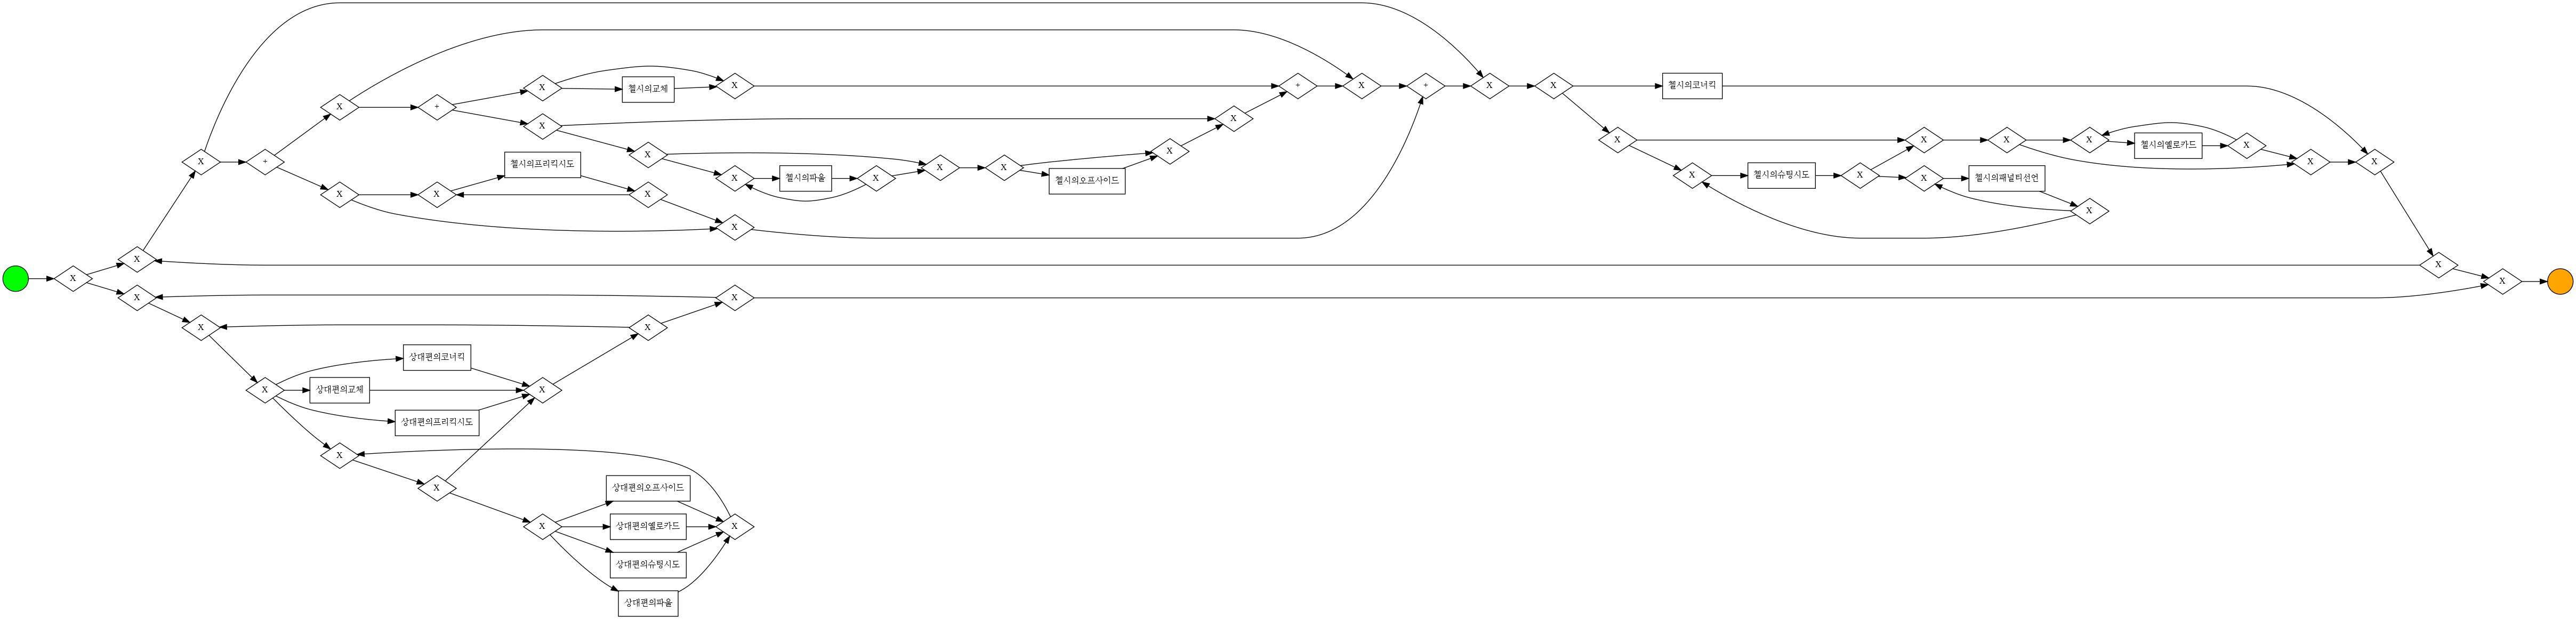

In [94]:
bpmn_Chelsea_win_goal_filtered = pm4py.discover_bpmn_inductive(goal_event_log_pm4py)
pm4py.view_bpmn(bpmn_Chelsea_win_goal_filtered)

In [ ]:
net, im, fm = inductive_miner.apply(goal_event_log_pm4py)
token_replay(goal_event_log_pm4py, net, im, fm)